# **Проект: Исследовательский анализ данных**

**Описание проекта:**

*В вашем распоряжении данные сервиса `Яндекс Недвижимость` — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.*

*Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.*

*О каждой квартире в базе содержится два типа данных: **добавленные пользователем** и **картографические**. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.* 

### **Описание данных:**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

---

**Часть первая. Импорт библиотек и базы данных.**
---


In [2]:
"""Первым делом - импортируем необходимые нам библиотеки:"""

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
"""Загружаем данные из файла в DataFrame (Путь к файлу в этом проекте: real_estate_data.csv)
Передаем дополнительным аргументом разделитель, так как данные в файле разделены не через запятую (по умолчанию)
В нашем случае разделителем является табуляция"""

data = pd.read_csv("real_estate_data.csv", sep='\t') 


**Часть вторая. EDA (Exploratory Data Analysis) (Предварительный анализ данных)**
---
> # **Описательная статистика (Descriptive Statistic)**

**Изучим общую информацию о данном DataFrame, используя методы:** 
- `.head()`, 
- `.tail()`, 
- `.info()`, 
- `.shape`, 
- `.columns`
- `describe()`

In [4]:
"""Выведем первые 5 строк DataFrame для визуальной оценки данных
Нас интересует общая архитектура построения данных, какие столбцы имеются, какими значениями заполнены и т.д. 
Испольщуем метод head(), если не передавать аргументы, по умолчанию выдаст 5 строк, что нам и нужно."""

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
"""Аналогично поступим и с последними 5 строками"""

data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
"""
Выведем общую информацию, используя метод info()
Тут нас будет интересовать количество заполненных и незаполненных данных, а так же тип данных:
Соответственно обращаем внимание на отношение столбца Column к столбцам Non-Null Count и Dtype
Пример взаимодействия: 
is_apartment (Аппартаменты ли?) - видим, что заполнено всего 2.775 значений из 23.699 максимальных, а так же определяем тип -
по столбцу Dtype - он в этом случае (object) - категориальный
"""

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из этих данных можем понять:
- Большое количество столбцов не полные, а конкретно:
- - ceiling_height (14504 из 23699)
- - floors_total (23613 из 23699)
- - living_area (21796 из 23699)
- - is_apartment (2775 из 23699)
- - kitchen_area (21421 из 23699)
- - balcony (12180 из 23699)
- - locality_name (23650 из 23699)
- - airports_nearest (18157 из 23699)
- - cityCenters_nearest (18180 из 23699)
- - parks_around3000 (18181 из 23699)
- - parks_nearest (8079 из 23699)
- - ponds_around3000 (18181 из 23699)
- - ponds_nearest (9110 из 23699)
- - days_exposition (20518 из 23699)
- Всего у нас типов данных: bool(2), float64(14), int64(3), object(3) 
Значение в скобках говорит о том, что этому типу данных принадлежит такое количество столбцов.
В основном наши данные имеют числовой тип

In [7]:
"""Определим размеры датасета в виде кортежа значений (количество строк, количество столбцов), используя .shape метод"""

data.shape

(23699, 22)

Наш датасет содержит 23699 строк и 22 столбца соответственно

In [8]:
"""Выведем названия всех столбцов, используя .columns метод"""

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Мы получили все названия столбцов, имеющихся в датасете

In [9]:
"""
Метод describe() в pandas выдает сводную статистику для числовых столбцов в DataFrame. 
Более точно, данный метод вычисляет следующие значения:
- count: количество непустых значений в столбце
- mean: среднее значение в столбце
- std: среднее квадратичное отклонение в столбце (sigma)
- min: минимальное значение в столбце
- 25%: первый квартиль (значение, которое меньше, чем 25% значений в столбце)
- 50%: медиана (значение, которое разделяет столбец пополам)
- 75%: третий квартиль (значение, которое меньше, чем 75% значений в столбце)
- max: максимальное значение в столбце

По умолчанию выводит сводную статистику только тех столбцов, в которых тип данных (dtype) - числовой (количественный)
Это можно изменить при передаче дополнительного параметра include:
- all (включить все столбцы)
- object (включить только категориальные значения)
"""

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сводная статистика очень помогает нам в нахождении аномалий в данных.
- Например по ней мы определили, что `living_area` (жилая площадь) в строке min (минимальное значение) имеет всего 2 квадратных метра, и конечно руководствуясь здравым смыслом, мы такое не допустим!
- Так же если посмотреть на `ceiling_height` (высота потолков), то можем заметить в строке max (максимальное значение) то, что в каких то квартирах высота потолков аж 100 метров! Так же считается аномалией, разумеется. К нему же относится и то, что минимальное значение - 1 метр. Это конечно может быть дом полуросликов из Властелина Колец, но не в случае человечества)
- `total_area` (общая жилая площадь) в максимальном значении имеет 900 метров, это конечно допустимо с точки зрения того, что это какой то гигантский дворец, необходимо уточнить удалять ли эти данные, или же оставить. В любом случе - их слишком мало, и это считается выбросом, который может влиять на статистику, поэтому я все же удалю, так как это учебный проект, и у меня нет возможности связаться с заказчиком)
- `rooms` (количество комнат) в минимальном значении мы наблюдаем 0. Спорный вопрос. Возможно так обозначется студия. Позже решим, аномалия ли это.
- `kitchen_area` (площадь кухни). Я конечно все понимаю, но 1.3 метра - это что? Одна микроволновка в сарае? Аномалия!
- `airports_nearest` (расстояние до ближайшего аэропорта) - обратим внимание на минимальное значение - 0. Квартира явно не в аэропорту, а значит что? Аномалия! 
- `parks_nearest` (расстояние до ближайшего парка) - смотрим минимальное значение и видим, что какая то квартира оказалась прямо в парке. Странно правда?

С числовыми аномалиями разобрались!

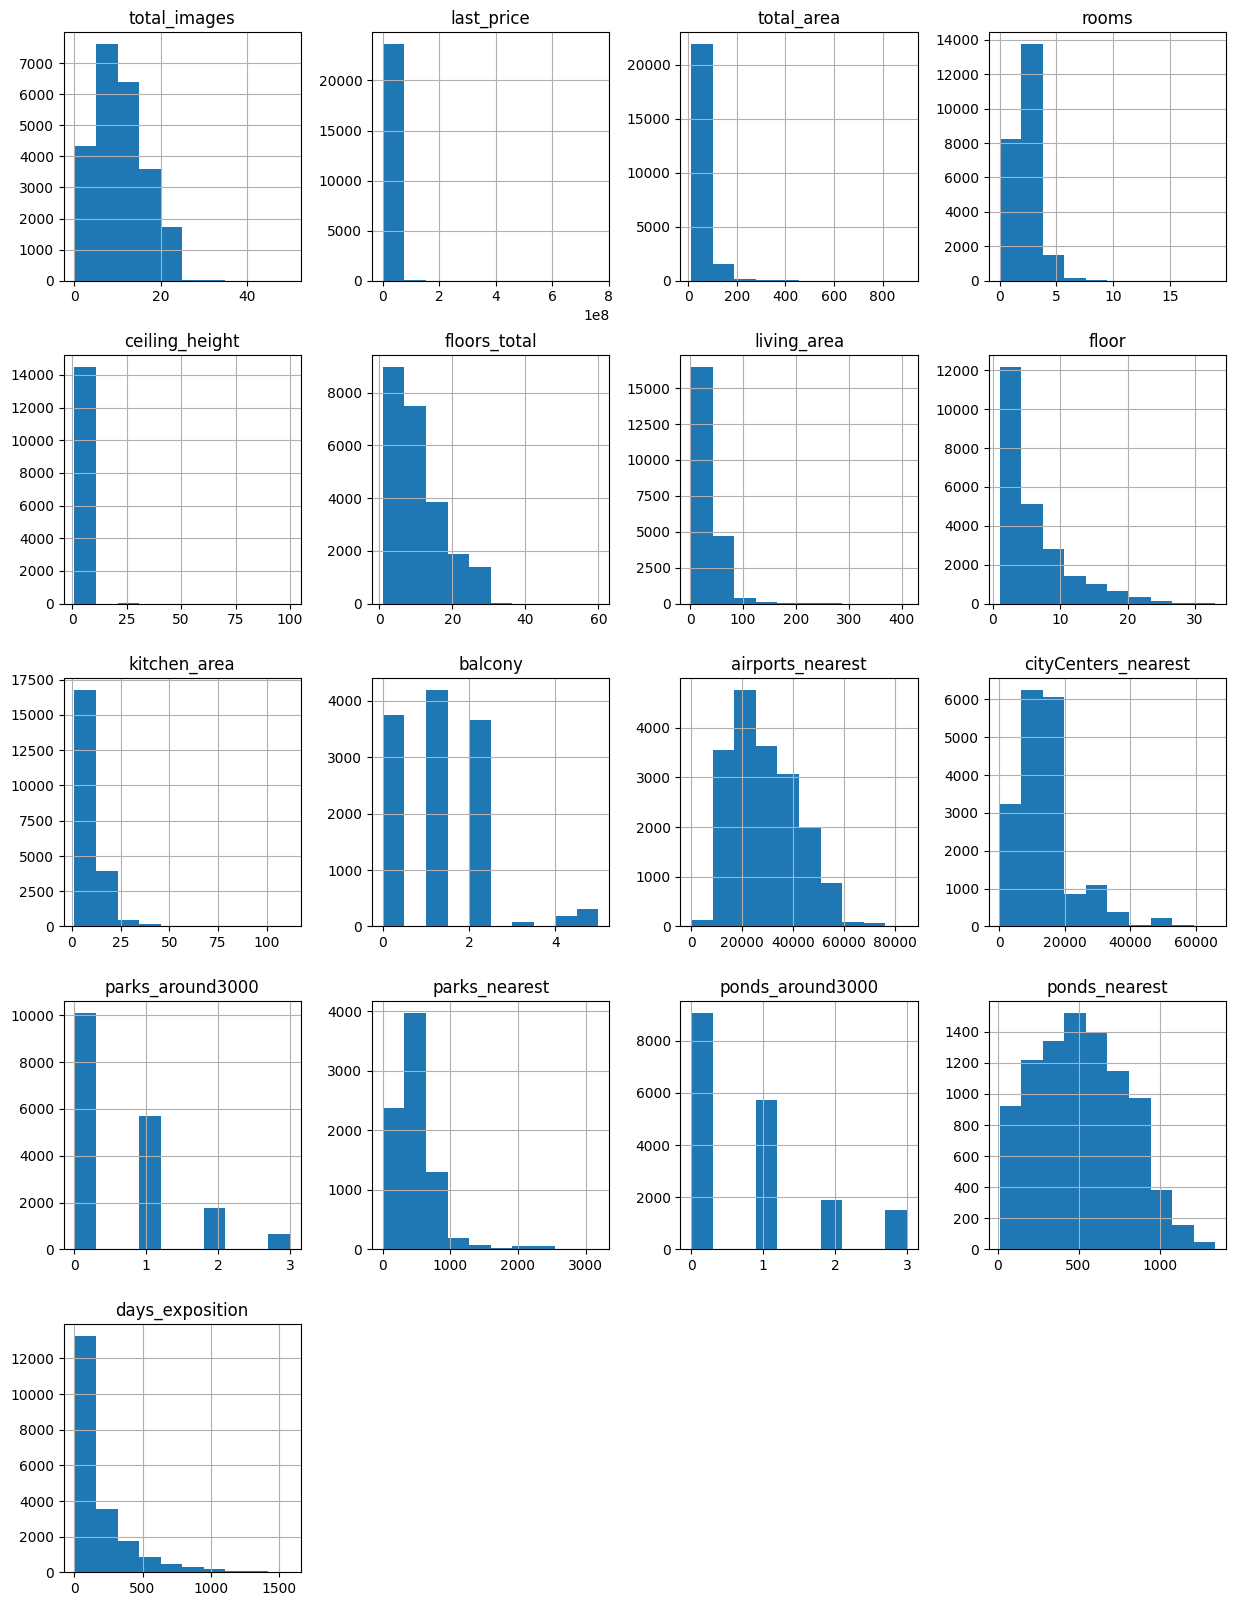

In [10]:
"""Визуализируем числовые данные для наглядности, используя встроенную в pandas функцию hist()
и для того, чтобы показать результат - plt.show() из библиотеки matplotlib"""

data.hist(figsize=(15, 20)) # аргументами в figsize метод передаем размеры по x и y осям
plt.show()

Мы составили эти графики, чтобы лучше понимать структуру и зависимости данных, так же нередко по визуальным графикам мы можем найти аномалии. А самое главное - количество значений, чтобы точно сказать, что аномалия, а что - нет!

In [11]:
"""Проверим, существуют ли дубликаты используя методы duplicated() и .sum()"""

data.duplicated().sum()

0

Дубликтов не обнаружено, к счастью!

> # **Пропущенные или нулевые значения (Missing Data)**

In [12]:
"""Определим количество пропущенных значений по столбцам"""

nan_columns = [i for i in data.columns if data[i].isnull().any()]
print(data.isnull().sum())
print(f"\n\nВ данных есть {len(nan_columns)} столбцов = {nan_columns}, с пустыми значениями")

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


В данных есть 14 столбцов = ['ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'], с пустыми значениями


Необходимо тщательно проанализировать эти данные. И понять, с чем связано то, что они пусты. И то, чем мы можем их заполнить, с точки зрения здравого смысла.

- `ceiling_height` (высота потолков) - Причина по которой данные не заполнены - неизвестна, возможно произошел массовый сбой, так как почти у половины квартир отсутствует очень важное значение. Определим по медиане из за большого количества выбросов.
- `floors_total` (количество этажей) - Можно предположить, что это ошибка, или же то, что это какой то частный дом. Заполним нулями
- `living_area` (жилая площадь) - Причина такого большого количества пропусков может заключаться в том, что продаются помимо жилых еще и промышленная или зона для магазинов. Определим по медиане, так как есть сильные выбросы, и их достаточно много, судя по графикам, которые строили ранее.
- `is_apartment` - так как это само по себе условие "апартаменты ли?" - то логично предположить, что если они не заполнены, то квартира не является апартаментами. Заполним `False` все пропущенные значения. Или же нулями, если потребуется.
- `kitchen_area` (площадь кухни) - Из за большого количества незаполненных значений можем предполжить, что кухня отсутствует. Есть некая взаимосвязь между (`living_area`) и (`kitchen_area`), скорее всего кухня отсутствует по причине того, что площадь не является жилой. Определим по медиане или среднему арифметическому.
- `balcony` (количество балконов) - можно интерпретировать информацию о том, почему не заполнены балконы, как "если не заполнены, значит их нет". Заполним нулями.
- `locality_name` (название населенного пункта) - должны быть заполнены. В данных - это местоположение по городам квартир. Заполнять их вручную нельзя, и брать какие то выдуманные или средние - тоже. Удалим, так как пропусков не так уж и много (всего 49)
- `airports_nearest` (расстояние до ближайшего аэропорта) - Скорее всего сбой. Определим по медиане.
- `cityCenters_nearest` (расстояние до центра) - Очень схоже с предыдущим пунктом. Определим по медиане из за большого разброса.
- `parks_around3000` (количество парков в районе 3 км) - интерпретируем, как "если данные не заполнены, значит рядом нет парка". Заполним нулями.
- `parks_nearest` (расстояние до ближайшего парка) - Аналогичный сбой с (`airports_nearest`) и (`cityCenters_nearest`). Определим по медиане
- `ponds_around3000` (количество водоемов в районе 3 км) - интерпретируем, как "если данные не заполнены, значит рядом нет водоема". Заполним нулями.
- `ponds_nearest` (расстояние до ближайшего водоема) - Можем выдать заключение, что данные из столбцов: (`ponds_nearest`), (`airports_nearest`), (`cityCenters_nearest`) и (`parks_nearest`) взаимосвязаны тем, что произошел сбой с картой и все что связано с расстоянием потерялось. Определим по медиане
- `days_exposition` (сколько дней было размещено объявление) - Варианта два: либо квартира еще не выложена, либо еще не снята. Определим по медиане из за большого разброса.

### **Начнем с удаления аномалий**

Первым в очереди будет `living_area`

In [13]:
"""Определим первые 20 значений, чтобы оценить минимальные значения по столбцу
- Сначала выведем важные для нас значения для более точного анализа:
- - медианное
- - среднее арифметическое
- - мода
- - максимум и минимум
Для удобства создадим функцию. 
- После чего используем метод .sort_values() для сортировки по возрастанию и выведем только первые 20 значений.
""" 

def specifications(data, column):
    max_value = data[column].max()
    min_value = data[column].min()
    mean_value = round(data[column].mean(), 6)
    median_value = round(data[column].median(), 6)
    mode_value = data[column].mode().iloc[0]  # добавляем .iloc[0], чтобы получить первое значение из серии
    
    print(f'Данные по столбцу {column}\n\n'
          f'Максимальное значение:  {max_value:}\n'
          f'Минимальное значение:   {min_value:}\n'
          f'Среднее значение:       {mean_value:}\n'
          f'Медианное значение:     {median_value:}\n'
          f'Значение моды:          {mode_value:}')


specifications(data, "living_area")
data["living_area"].sort_values().head(20)

Данные по столбцу living_area

Максимальное значение:  409.7
Минимальное значение:   2.0
Среднее значение:       34.457852
Медианное значение:     30.0
Значение моды:          18.0


21758    2.0
13915    2.0
23574    3.0
3242     3.0
17582    5.0
21943    5.4
16431    6.0
19251    6.5
20994    8.0
23208    8.0
114      8.3
2309     8.4
21505    8.5
17248    8.9
15833    9.0
4542     9.0
1326     9.0
680      9.0
19620    9.0
7312     9.0
Name: living_area, dtype: float64

Проверим количество значений ниже или равной 9, так как по данным из интернета - это самое минимальное значение жилой площади на человека и оценим влияние на среднее арифметическое

In [14]:
"""Для проверки количества присвоим переменной данные по столбцу удовлетворяющие условию и используем sum() для суммы этих значений"""

area_min = (data["living_area"] < 9).sum()
print(f"Количество квартир с жилой площадью менее 9 кв.м. = {area_min}")

Количество квартир с жилой площадью менее 9 кв.м. = 14


In [15]:
"""Используем функцию display, для того, чтобы просмотреть данные при определенном условии. 
Условие выставляем на >= 9, так как нам нужно просмотреть статистические изменения для данных, которые выше 9, ведь мы собираемся удалить
те, что ниже. Для отображения данных используем describe()"""

display(data.query('living_area >= 9')['living_area'].describe())

count    21782.000000
mean        34.476189
std         22.025555
min          9.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Не обращаем внимания на `count`, так как в столбце присутствуют NaN значения и из за этого все выглядит так, будто удалится очень много значений.

Значительных изменений нет. Можем удалять все квартиры, в которых жилая площадь аномально низка

Но для начала проверим максимум, чтобы рассмотреть аномалии с другой стороны.

In [16]:
"""Так как в конце всегда будут NaN, а у нас в датасете living_area не полностью заполнена, то используем дополнительно
метод dropna(), чтобы выбросить все значения, содержащие NaN и получить только числовые."""

data["living_area"].dropna().sort_values().tail(20)

6221     248.7
12971    250.0
793      250.0
15151    250.0
1494     250.0
15701    250.0
1085     255.7
15651    258.0
19865    260.0
14498    264.5
22494    274.0
20273    279.6
14088    300.0
8018     301.5
660      312.5
12859    322.3
4237     332.0
12401    347.5
5358     409.0
19540    409.7
Name: living_area, dtype: float64

In [17]:
"""Проверим количество значений выше 200 и оценим значимость"""

area_max = (data["living_area"] > 200).sum()
print(f"Количество квартир с жилой площадью более 200 кв.м. = {area_max}")

display(data.query('living_area <= 200')['living_area'].describe())

Количество квартир с жилой площадью более 200 кв.м. = 31


count    21765.000000
mean        34.126513
std         20.124531
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        200.000000
Name: living_area, dtype: float64

**Теперь давайте удалим наши аномальные значения по этому столбцу.**

In [18]:
"""Получаем индексы строк, которые нужно удалить при помощи метода index, используя loc и логическое выражение внутри него"""

idx_to_drop = data.loc[(data['living_area'] < 9) | (data['living_area'] > 200)].index

"""Удаляем строки по индексам, параметр inplace по умолчанию стоит, как False, нам необходимо изменить его на True
- Это важно, так как этот параметр внесет изменения в DataFrame, без него - вернет новый DataFrame"""

data.drop(index=idx_to_drop, inplace=True)

"""Для удобства так же создадим функцию"""

def droppy(data, column, minimum, maximum):
    # Если передать 0 аргументом minimum, то будут рассматриваться только те, что выше максимума
    if minimum == 0:
        index_to_drop = data.loc[data[column] > maximum].index 
    # Если передать 0 аргументом maximum, то будут рассматриваться только те, что ниже минимума
    elif maximum == 0:
        index_to_drop = data.loc[data[column] < minimum].index
    # Если оба аргумента ненулевые, то будет двойное условие с "или" (|)
    else:
        index_to_drop = data.loc[(data[column] < minimum) | (data[column] > maximum)].index
    return data.drop(index=index_to_drop, inplace=True)


droppy(data, "living_area", 9, 200)

In [19]:
"""Проверим текущие значения по столбцу"""

specifications(data, "living_area")

Данные по столбцу living_area

Максимальное значение:  200.0
Минимальное значение:   9.0
Среднее значение:       34.144662
Медианное значение:     30.0
Значение моды:          18.0


Удалив совсем немного аномальных значений мы снизили среднее арифметическое. Оно изменилось с 34.46 до 34.14 (0,32)

Медиана и мода остались прежними. Максимальное и минимальное значения изменились, на что мы и рассчитывали.

Точность и объективность данных будет выше, удаляя выбросы, и тогда когда будем заполнять пропущенные значения - это немного, но повлияет на точность вычислений и иногда даже на результат.

Вторым на очереди у нас... Барабанная дроообь - `ceiling_heigth`

Поступим аналогично прошлому примеру с `living_area`, порядок и методы, используем те же самые. Но не будем удалять аномально высокие, а поделим на 10, чтобы урегулировать ситуацию с потолками таким образом.

In [20]:
data["ceiling_height"].sort_values().head(20)

22590    1.00
5712     1.20
16934    1.75
20520    2.00
4212     2.00
16884    2.00
11352    2.00
19329    2.00
16446    2.00
19098    2.00
552      2.00
2572     2.00
22960    2.00
5850     2.00
12755    2.20
17794    2.25
17762    2.30
1582     2.30
5498     2.30
23498    2.30
Name: ceiling_height, dtype: float64

Согласно СП 54.13330.2011 минимальная высота потолков должна быть 2.5

In [21]:
data["ceiling_height"].dropna().sort_values().tail(27)

15743      8.0
5863       8.3
22309     10.3
15061     14.0
17496     20.0
20507     22.6
5076      24.0
6246      25.0
11285     25.0
355       25.0
14382     25.0
4643      25.0
18545     25.0
9379      25.0
5669      26.0
10773     27.0
5807      27.0
4876      27.0
5246      27.0
22938     27.0
20478     27.0
17857     27.0
21824     27.0
21377     27.5
22336     32.0
3148      32.0
22869    100.0
Name: ceiling_height, dtype: float64

Тут руководствуясь логикой, аномальными значениями будем считать те, что выше 10 метров

In [22]:
"""Проверим значения на текущий момент"""

specifications(data, "ceiling_height")

Данные по столбцу ceiling_height

Максимальное значение:  100.0
Минимальное значение:   1.0
Среднее значение:       2.770303
Медианное значение:     2.65
Значение моды:          2.5


In [23]:
"""Изменим эти данные, разделив на 10, тем самым значение 25 превратится в 2.5, а 100 в 10"""

data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height'] / 10

In [24]:
"""Уточним, сколько квартир имеют аномально низкие и высокие показатели высоты потолков и оценим их влияние"""

height = (data["ceiling_height"] < 2.5).sum()
print(f"Количество квартир с высотой потолков менее 2.5 метров = {height}")

height_max = (data["ceiling_height"] > 4).sum()
print(f"Количество квартир с высотой потолков более 4 метров = {height_max}")


display(data.query('2 < ceiling_height <= 4')['ceiling_height'].describe())

Количество квартир с высотой потолков менее 2.5 метров = 78
Количество квартир с высотой потолков более 4 метров = 48


count    14406.000000
mean         2.720478
std          0.255881
min          2.200000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

In [25]:
"""Удалим аномалии: значения менее 2.5 метра и выше 4 метров (руководствуюясь логикой)"""

droppy(data, "ceiling_height", 2.5, 4)

In [26]:
"""Проверим текущие данные"""

specifications(data, "ceiling_height")

Данные по столбцу ceiling_height

Максимальное значение:  4.0
Минимальное значение:   2.5
Среднее значение:       2.721781
Медианное значение:     2.65
Значение моды:          2.5


Среднее значение изменилось с 2.77 до 2.72 (0.05), но в любом случае, точность и объективность вычислений тем самым немного повысилась.

Третьим на очереди анализа `total_area`

Сделаем абсолютно то же самое, что и в предыдущие 2 раза, без комментариев.

In [27]:
specifications(data, "total_area")

Данные по столбцу total_area

Максимальное значение:  631.0
Минимальное значение:   12.0
Среднее значение:       59.787857
Медианное значение:     52.0
Значение моды:          45.0


In [28]:
data["total_area"].sort_values().head(20)

19904    12.00
19546    13.00
19807    13.00
17961    13.00
19558    13.20
19642    14.00
16949    15.00
12040    15.00
8886     15.50
9412     16.00
716      17.00
10208    17.00
22356    17.20
9157     17.60
21802    17.78
19311    18.00
12996    18.00
4542     18.00
20714    18.00
6084     18.00
Name: total_area, dtype: float64

Аномальных значений не обнаружено, так как площадь микроквартир может быть даже 10 кв.м. Все наши значения выше.

In [29]:
data["total_area"].dropna().sort_values().tail(20)

16179    336.00
20820    342.00
10569    347.50
6183     363.10
10684    364.70
19961    365.00
581      365.00
19392    371.00
21990    373.10
7674     380.00
5042     380.00
8822     398.00
5873     400.00
14991    413.50
22131    422.20
3676     441.98
9826     494.10
5893     500.00
15016    500.00
3117     631.00
Name: total_area, dtype: float64

Тут мы точно не сможем сказать, имеются ли выбросы, так как все значения растут не слишком быстро, проверим количество!

In [30]:
"""Оценим количество квартир с общей площадью выше 200 и оценим влияние"""

total_max = (data["total_area"] > 200).sum()
print(f"Количество квартир с общей площадью более 200: {total_max}")

display(data.query('total_area <= 200')['total_area'].describe())

Количество квартир с общей площадью более 200: 187


count    23341.000000
mean        58.178836
std         26.511683
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        200.000000
Name: total_area, dtype: float64

Всего 184 квартиры, что в сравненнии с нашим датасетом - ничего. Все это будем считать выбросами.

In [31]:
droppy(data, "total_area", 0, 200)

In [32]:
specifications(data, "total_area")

Данные по столбцу total_area

Максимальное значение:  200.0
Минимальное значение:   12.0
Среднее значение:       58.178836
Медианное значение:     52.0
Значение моды:          45.0


Среднее значение изменилось с 59.9 до 58.2. Целых 1.7!, что повысило точность еще сильнее.

Следующая ситуация с `rooms`

In [33]:
specifications(data, "rooms")

Данные по столбцу rooms

Максимальное значение:  11
Минимальное значение:   0
Среднее значение:       2.034617
Медианное значение:     2.0
Значение моды:          1


In [34]:
data["rooms"].sort_values().head(50)

8718     0
7625     0
8271     0
6220     0
16521    0
18444    0
6225     0
3147     0
608      0
21425    0
3458     0
20648    0
15714    0
15712    0
1277     0
11051    0
15704    0
12130    0
11035    0
15105    0
15109    0
21628    0
14064    0
1260     0
18185    0
22416    0
17182    0
3435     0
22832    0
12737    0
13471    0
15756    0
9817     0
15434    0
17483    0
8454     0
697      0
2270     0
17452    0
17449    0
8408     0
23637    0
2055     0
22521    0
20254    0
19697    0
5074     0
4115     0
20045    0
17380    0
Name: rooms, dtype: int64

Можем заметить, что даже в выборке из 50 значений - все нулевые. Это может произойти только в том случае, если по задумке 0 комнат - это студия. 

In [35]:
"""Проверим количество квартир с нулевыми значениями"""

zero_rooms_count = (data["rooms"] == 0).sum()
print(f"Количество квартир с нулевым количеством комнат: {zero_rooms_count}")

Количество квартир с нулевым количеством комнат: 193


In [36]:
"""Проанализируем по какой причине целых 195 квартир нулевые"""

null_rooms = data.loc[data['rooms'] == 0]
print(null_rooms)

       total_images  last_price  total_area first_day_exposition  rooms  \
144               1   2450000.0       27.00  2017-03-30T00:00:00      0   
349               4   2320000.0       25.00  2017-09-27T00:00:00      0   
440               8   2480000.0       27.11  2018-03-12T00:00:00      0   
508               0   3375000.0       34.40  2017-03-28T00:00:00      0   
608               2   1850000.0       25.00  2019-02-20T00:00:00      0   
...             ...         ...         ...                  ...    ...   
23210             7   3200000.0       26.00  2017-09-01T00:00:00      0   
23442             0   2500000.0       27.70  2017-09-28T00:00:00      0   
23554            15   3350000.0       26.00  2018-09-07T00:00:00      0   
23592            10   1450000.0       29.00  2017-11-11T00:00:00      0   
23637             8   2350000.0       26.00  2018-06-26T00:00:00      0   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
144               NaN 

Причина, по которой количество комнат нулевое, при этом, можем заметить, что is_apartment тоже пуст, значит однозначно не можем сказать "да, это студия". В реальном проекте стоит уточнить по какой причине это значение является нулевым.
Будем считать, что это студия, изменять данные не будем.

Разберем `kitchen_area`

In [37]:
data["kitchen_area"].sort_values().head(25)

20217    1.30
19642    2.00
906      2.00
11033    2.00
6262     2.00
16367    2.00
21419    2.00
9138     2.00
17834    2.30
8729     2.40
7950     2.89
10208    3.00
2165     3.00
17424    3.00
13814    3.00
6084     3.00
18066    3.00
15014    3.00
3078     3.20
14836    3.30
12595    3.40
10058    3.50
12370    3.50
14183    3.50
8712     3.70
Name: kitchen_area, dtype: float64

Минимальная площадь кухни, допускаемая нормативом для однокомнатных квартир — 5 кв.м. В квартирах большего размера согласно СП 54.13330 кухня должна быть уже не меньше 8 кв.м. Уточним, сколько квартир имеет площадь менее 5 кв.м

In [38]:
kitchen_area_min = (data["kitchen_area"] < 5).sum()
print(f"Количество квартир, где кухня меньше 5 кв.м. = {kitchen_area_min}")

Количество квартир, где кухня меньше 5 кв.м. = 103


In [39]:
"""Проверим текущие значения по kitchen_area"""

specifications(data, "kitchen_area")

Данные по столбцу kitchen_area

Максимальное значение:  93.2
Минимальное значение:   1.3
Среднее значение:       10.384362
Медианное значение:     9.0
Значение моды:          6.0


Но для начала давайте проверим, насколько сильно это повлияет на значения среднего

In [40]:
display(data.query('kitchen_area >= 5')['kitchen_area'].describe())

count    21005.000000
mean        10.415688
std          5.357393
min          5.000000
25%          7.000000
50%          9.100000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

Как видим, если убрать эти значения, немного увеличится среднее значение. Но нужно еще проверить аномалии с другой стороны

In [41]:
"""Проверим количество квартир, где кухня имеет площадь выше 50 кв.м."""

kitchen_area_max = (data["kitchen_area"] > 50).sum()
print(f"Количество квартир, где кухня больше 50 кв.м. = {kitchen_area_max}")

Количество квартир, где кухня больше 50 кв.м. = 27


Будем считать аномальным - значение выше 50

In [42]:
"""Проверим значимость этих квартир по отношению к среднему арифметическому"""

display(data.query('kitchen_area <= 50')['kitchen_area'].describe())

count    21081.000000
mean        10.316575
std          5.002295
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max         50.000000
Name: kitchen_area, dtype: float64

Как видим, удаление этих квартир оказывает большое влияние на среднее арифметическое. Значит эти выбросы мешают статистически объективной оценке.

In [43]:
"""Удалим аномалии с минимальной и максимальной сторон"""

droppy(data, "kitchen_area", 5, 50)

In [44]:
specifications(data, "kitchen_area")

Данные по столбцу kitchen_area

Максимальное значение:  50.0
Минимальное значение:   5.0
Среднее значение:       10.347608
Медианное значение:     9.1
Значение моды:          6.0


Снизили среднее с 10.39 до 10.35 (0.04)

На очереди `airports_nearest`

In [45]:
data["airports_nearest"].sort_values().head(5)

21085       0.0
12899    6450.0
4017     6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64

Всего одна аномалия! Квартира не может находиться в аэропорту, давайте заменим ее, а не будем удалять!

In [46]:
"""Присвоим значение медианы по столбцу airports_nearest значению, равному нулю"""

data.loc[data["airports_nearest"] == 0, "airports_nearest"] = data["airports_nearest"].median()

In [47]:
"""Проверим изменения"""

data["airports_nearest"].sort_values().head(5)

4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
5074     6989.0
Name: airports_nearest, dtype: float64

Все получилось. Максимального предела в расстоянии нет.

Последнее: Удалить аномалии для столбца `last_price`

In [48]:
data["last_price"].sort_values().head(10)

8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
9581     450000.0
17676    450000.0
5698     450000.0
16219    450000.0
21912    470000.0
23484    470000.0
Name: last_price, dtype: float64

In [49]:
"""Изменим первое значение на медианное, так как оно аномально низкое"""

data.loc[data["last_price"] == 12190, "last_price"] = data["last_price"].median()

In [50]:
data["last_price"].dropna().sort_values().tail(10)

6813      79000000.0
6462      82000000.0
10362     83820000.0
11430     85000000.0
12045     86738800.0
11329     95000000.0
16590     98000000.0
4996     124000000.0
22831    289238400.0
1436     330000000.0
Name: last_price, dtype: float64

Необходимо проверить, сколько квартир с такими высокими ценами

In [51]:
data["last_price"].describe()

count    2.321100e+04
mean     5.993276e+06
std      6.005328e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [52]:
last = (data["last_price"] > 20000000).sum()
print(f"Количество квартир, стоимость которых превышает 20.000.000. = {last}")

Количество квартир, стоимость которых превышает 20.000.000. = 497


In [53]:
"""Удалим значения выше 20.000.000, как аномальные"""

droppy(data, "last_price", 0, 20000000)

In [54]:
"""Проверим то, как изменились данные"""

data["last_price"].describe()

count    2.271400e+04
mean     5.410857e+06
std      3.180951e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

### **Теперь можно переходить к заполнению пропущенных данных!**

Проверим еще раз количество пустых данных по столбцам

In [55]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8912
floors_total               83
living_area              1792
floor                       0
is_apartment            20061
studio                      0
open_plan                   0
kitchen_area             2176
balcony                 10992
locality_name              48
airports_nearest         5447
cityCenters_nearest      5430
parks_around3000         5429
parks_nearest           15240
ponds_around3000         5429
ponds_nearest           14233
days_exposition          2943
dtype: int64

Давайте сразу заполним нулями столбцы:
- `balcony`
- `parks_around3000`
- `ponds_around3000`
- `floors_total`

In [56]:
"""Для заполнения данных трех столбцов нулями, нам нужно обозначить их в списке, пройтись по нему циклом for и в каждом
произвести изменения при помощи fillna(), аргументом передаем 0, как и договаривались). После чего можно сразу проверить, все ли прошло
удачно"""

columns_to_fill = ['balcony', 'parks_around3000', 'ponds_around3000', "floors_total"]
for column in columns_to_fill:
    data[column] = data[column].fillna(0)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8912
floors_total                0
living_area              1792
floor                       0
is_apartment            20061
studio                      0
open_plan                   0
kitchen_area             2176
balcony                     0
locality_name              48
airports_nearest         5447
cityCenters_nearest      5430
parks_around3000            0
parks_nearest           15240
ponds_around3000            0
ponds_nearest           14233
days_exposition          2943
dtype: int64

Отлично. Данные заполнены! Осталось разобраться с остальными

Давайте удалим 49 значений `locality_name` так как заполнить все равно не сможем(

In [57]:
"""Для удаления строк, являющихся пустыми по столбцу мы можем использовать метод dropna() с двумя аргументами
- subset - подмножество
- inplace - внесение изменений в DataFrame"""

data.dropna(subset=['locality_name'], inplace=True)

Теперь давайте заполним следующие столбцы медианой:
- `ceiling_height`
- `kitchen_area`
- `living_area`
- `ponds_nearest`
- `parks_nearest`
- `cityCenters_nearest`
- `airports_nearest`

In [58]:
columns_to_fill = ['ceiling_height', 'kitchen_area', 'living_area', "airports_nearest", "cityCenters_nearest", "parks_nearest", "ponds_nearest"]
for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].median())

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20027
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          2942
dtype: int64

Остались только `is_apartment` и `days_exposition`

In [59]:
"""Проверим уже заполненные значения is_apartment, чтобы правильно заполнить пустые"""

data["is_apartment"].dropna().head(5)

11    False
25    False
29    False
36    False
41    False
Name: is_apartment, dtype: object

Это не строчное значение False, а булево, соответственно заполняем булевым

In [60]:
data["is_apartment"] = data["is_apartment"].fillna(False)

Отлично, осталось разобраться с `days_exposition`, поступим аналогично

In [61]:
data["days_exposition"].dropna().head(5)

1     81.0
2    558.0
4    121.0
5     55.0
6    155.0
Name: days_exposition, dtype: float64

Это числовое значение. Значит у него есть своя описательная статистика

In [62]:
data["days_exposition"].describe()

count    19724.000000
mean       177.682468
std        216.438652
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

Заполним медианой в 95

In [63]:
data["days_exposition"] = data["days_exposition"].fillna(data["days_exposition"].median())

Проверим, остались ли пустые значения

In [64]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Пустых значений больше не осталось! Супер.

### **Изменение типа данных**

Для начала определим какой тип данных у каждого из столбца

In [65]:
"""Используем метод info(), он даст исчерпывающую информацию"""

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22666 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22666 non-null  int64  
 1   last_price            22666 non-null  float64
 2   total_area            22666 non-null  float64
 3   first_day_exposition  22666 non-null  object 
 4   rooms                 22666 non-null  int64  
 5   ceiling_height        22666 non-null  float64
 6   floors_total          22666 non-null  float64
 7   living_area           22666 non-null  float64
 8   floor                 22666 non-null  int64  
 9   is_apartment          22666 non-null  bool   
 10  studio                22666 non-null  bool   
 11  open_plan             22666 non-null  bool   
 12  kitchen_area          22666 non-null  float64
 13  balcony               22666 non-null  float64
 14  locality_name         22666 non-null  object 
 15  airports_nearest   

Первым делом необходимо изменить строковое представление `first_day_exposition` в datetime64

In [66]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
# Формат настраиваем в соответствии с примером: 2019-03-07T00:00:00

In [67]:
"""Проверим изменился ли тип данных"""

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22666 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22666 non-null  int64         
 1   last_price            22666 non-null  float64       
 2   total_area            22666 non-null  float64       
 3   first_day_exposition  22666 non-null  datetime64[ns]
 4   rooms                 22666 non-null  int64         
 5   ceiling_height        22666 non-null  float64       
 6   floors_total          22666 non-null  float64       
 7   living_area           22666 non-null  float64       
 8   floor                 22666 non-null  int64         
 9   is_apartment          22666 non-null  bool          
 10  studio                22666 non-null  bool          
 11  open_plan             22666 non-null  bool          
 12  kitchen_area          22666 non-null  float64       
 13  balcony         

Видим, что теперь Dtype = datetime64[ns]

Проверим какие значения из float64 можно заменить на int

In [68]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,93.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,456.0,0.0,510.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,9.1,0.0,городской посёлок Янино-1,26911.0,13288.0,0.0,456.0,0.0,510.0,55.0


Изменим все значения, которые нельзя измерить не в целых числах. Например не может быть половины балкона, или же половины этажа.

In [69]:
"""Для изменения типа данных, воспользуемся методом astype() передав аргмуентом нужный нам тип"""

data["days_exposition"] = data["days_exposition"].round()
for column in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    data[column] = data[column].astype('Int64')

Проверим и убедимся, что с данными теперь все в порядке

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22666 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22666 non-null  int64         
 1   last_price            22666 non-null  float64       
 2   total_area            22666 non-null  float64       
 3   first_day_exposition  22666 non-null  datetime64[ns]
 4   rooms                 22666 non-null  int64         
 5   ceiling_height        22666 non-null  float64       
 6   floors_total          22666 non-null  Int64         
 7   living_area           22666 non-null  float64       
 8   floor                 22666 non-null  int64         
 9   is_apartment          22666 non-null  bool          
 10  studio                22666 non-null  bool          
 11  open_plan             22666 non-null  bool          
 12  kitchen_area          22666 non-null  float64       
 13  balcony         

### **Изучим уникальные значения и устраним неявные дубликаты**

In [71]:
"""В locality_name находятся записи с местоположением, там могут быть неявные дубликаты. Проверим, используя unique()"""

print(f"Количество уникальных значений: {len(data['locality_name'].unique())}")
data['locality_name'].sort_values().unique()

Количество уникальных значений: 361


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

Заменим все `ё` на `e`, и схожие данные, типа `поселок городского типа` и `городской поселок` на `поселок`

In [72]:
"""Заменяем данные, используя метод replace() передаем аргументом словарь с ключами, которые нужно заменить на значение соответствующее
- параметр regex=True нужен для того, чтобы метод replace() искал соответствия во всей строке, а не только в начале или конце."""

data['locality_name'] = data['locality_name'].replace({
    'ё': 'е',
    'поселок городского типа': 'поселок',
    'поселок станции': 'поселок при железнодорожной станции',
    'садовое товарищество': 'садоводческое некоммерческое товарищество',
    'городской поселок': 'поселок'
}, regex=True)

In [73]:
"""Проверим изменения"""

print(f"Количество уникальных значений: {len(data['locality_name'].unique())}")
data['locality_name'].sort_values().unique()

Количество уникальных значений: 333


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Будогощь', 'городской поселок Виллози',
       'городской поселок Лесогорский', 'городской поселок Мга',
       'городской поселок Назия', 'городской поселок Новоселье',
       'городской поселок Павлово', 'городской поселок Рощино',
       'городской поселок Советский', 'городской поселок Федоровское',
       'городской поселок Янино-1', 'деревня Агалатово', 'дерев

Было 361 уникальное значение, осталось 333, значит мы удалили неявные дубликаты

> # **Часть третья. Добавление данных**

Добавьте в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [74]:
"""Добавим все эти столбцы"""

# Цена одного квадратного метра рассчитывается путем деления цены на общий метраж
data["price_per_meter"] = (data["last_price"] / data["total_area"]).round() # дополнительно округлим значение, чтобы вывод был красивым

# День недели публикации объявления (0 — понедельник, 1 — вторник и так далее): Применим метод dt.weekday для этого
data['day_of_the_week'] = data['first_day_exposition'].dt.weekday

# Месяц публикации объявления аналогично, но используем не weekday, а month:
data['month_of_publication'] = data['first_day_exposition'].dt.month

# Год публикации объявления dt.year соответственно:
data['year_of_publication'] = data['first_day_exposition'].dt.year

# Тип этажа квартиры, создаем функцию, для того, чтобы использовать ее в методе apply
def floors(data):
    if data['floor'] == 1:
        return 'первый'
    elif data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'
    

data['floor_type'] = data.apply(floors, axis=1)

# Расстояние до центра города в километрах (в одном километре 1000 метров, для округления используем round()):
data['distance_to_the_city_center'] = (data['cityCenters_nearest'] / 1000).round()

Проверим наш DataFrame

In [75]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_the_week,month_of_publication,year_of_publication,floor_type,distance_to_the_city_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,93,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,456.0,0,510.0,81,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2,574.0,558,92786.0,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1,48.0,121,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,456.0,0,510.0,55,95066.0,0,9,2018,другой,13.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,456.0,0,510.0,155,99196.0,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.00,22,False,...,456.0,0,510.0,93,110545.0,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,456.0,0,510.0,189,87455.0,2,5,2018,другой,13.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,456.0,0,510.0,289,88525.0,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,310.0,2,553.0,137,127525.0,3,11,2017,другой,14.0


> # **Часть четвертая. Исследовательский анализ данных**

Изучите следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

AxesSubplot(0.125,0.11;0.775x0.77)


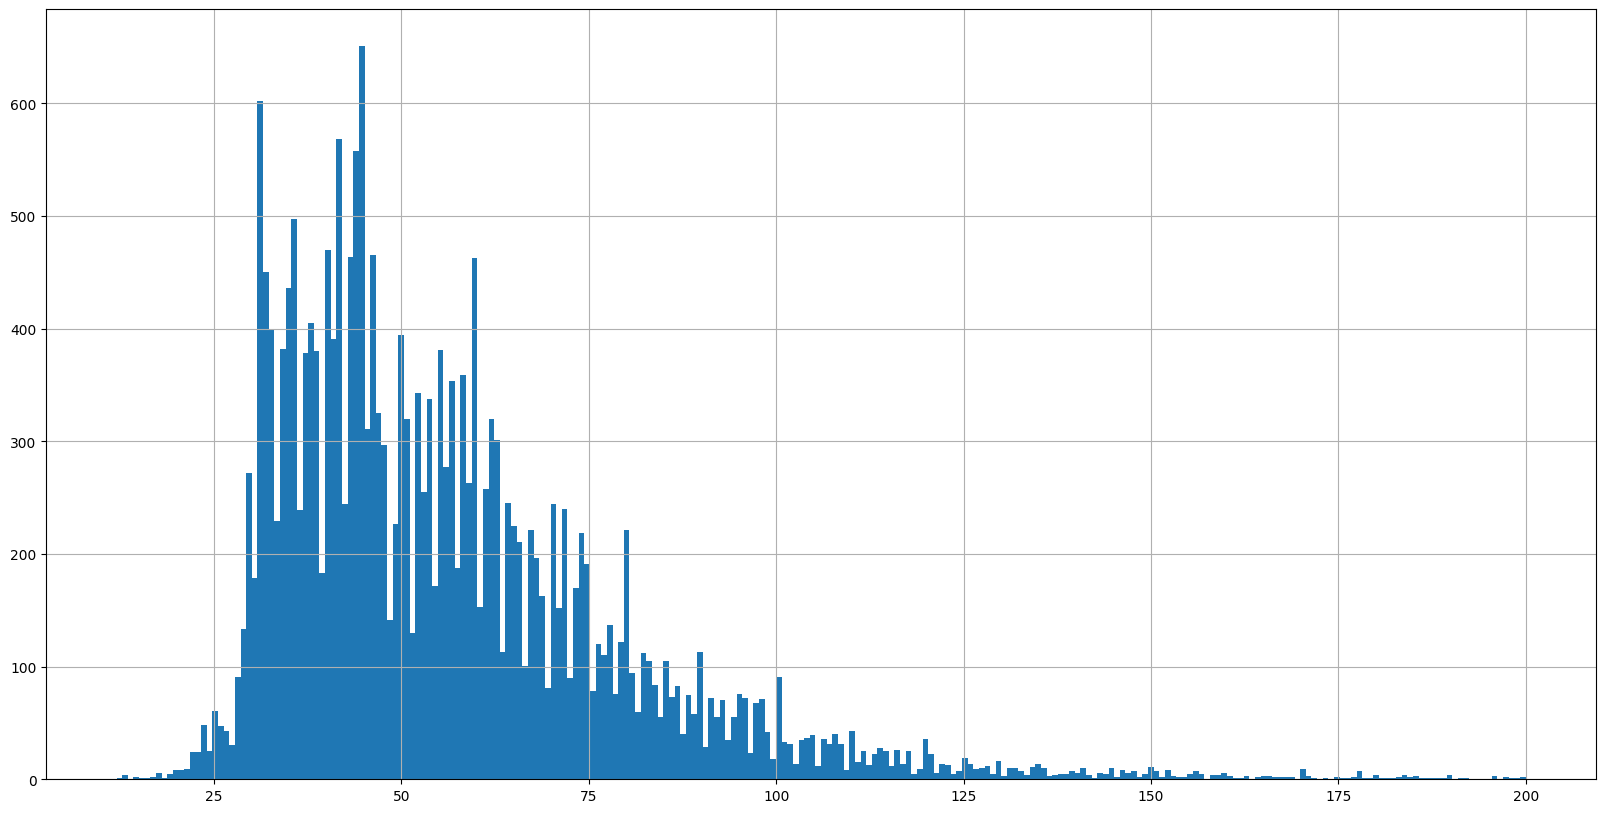

count    22666.000000
mean        56.458528
std         23.499788
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64

In [76]:
"""Создадим функцию для построения графиков и описательной статистики, так как этим нужно будет воспользоваться не один раз"""

def visual(data, column):
    print(data[column].hist(figsize=(20, 10), bins=250))
    plt.show()
    return display(data[column].describe())


# Общая жилая площадь
visual(data, "total_area")

Вывод: Среднее арифметическое выше медианы. Причина: выбросы вплоть до 200 кв.м. . Причина выбросов: либо пентхаусы, либо крупные частные дома.
Большинство значений находятся в интервале от 28 до 75 кв.м. 

AxesSubplot(0.125,0.11;0.775x0.77)


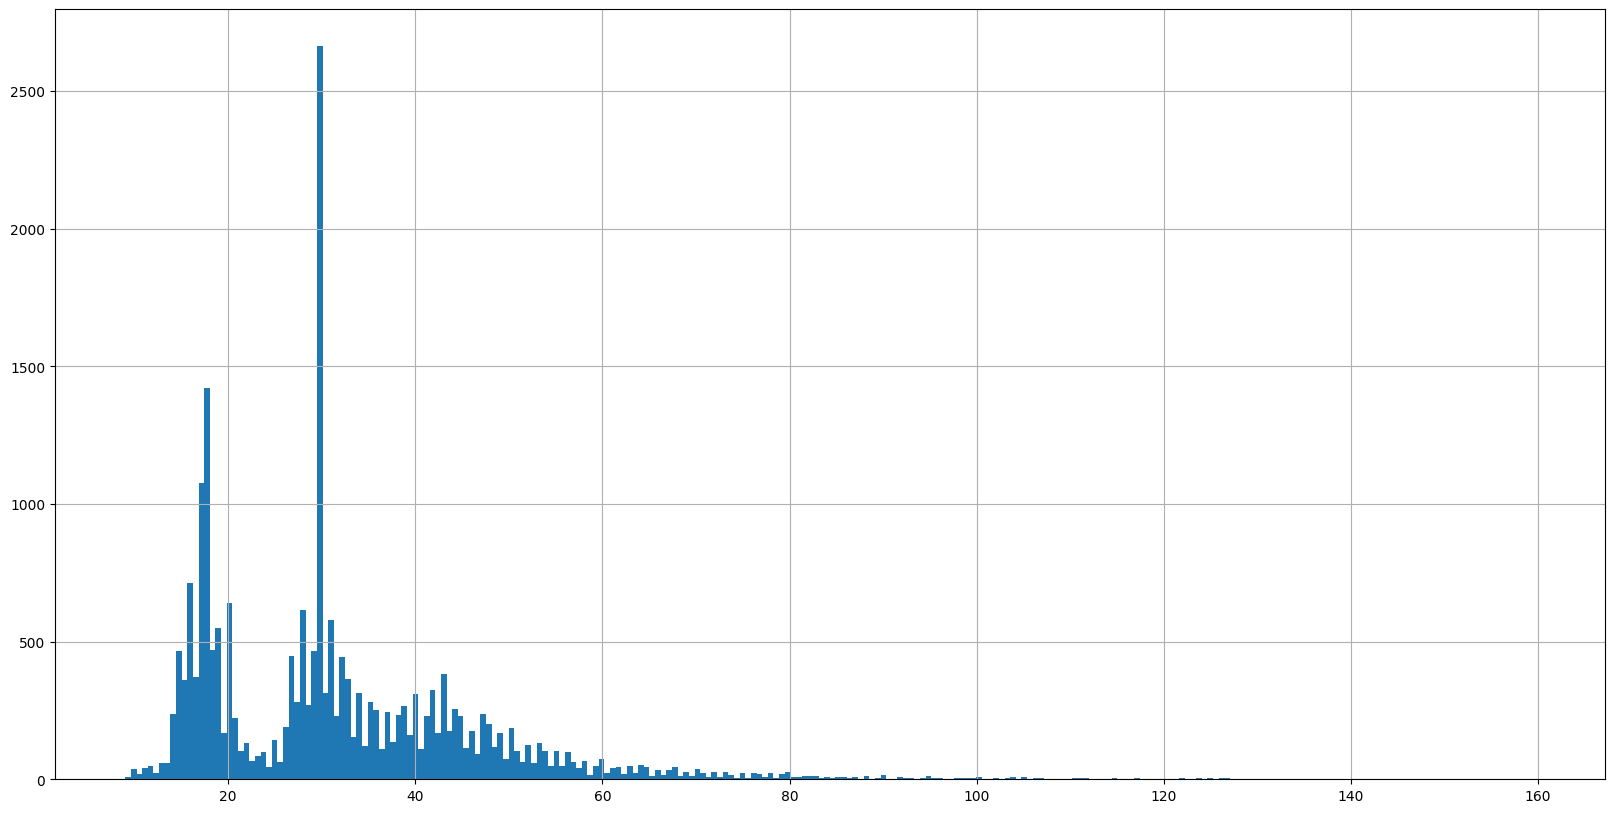

count    22666.000000
mean        32.203061
std         15.391748
min          9.000000
25%         19.000000
50%         30.000000
75%         40.000000
max        159.600000
Name: living_area, dtype: float64

In [77]:
# Жилая площадь
visual(data, "living_area")

Вывод: среднее значение совсем немного выше медианного, выбросов меньше, чем в прошлом примере. Большинство значений находятся в районе 15-37 кв.м.

AxesSubplot(0.125,0.11;0.775x0.77)


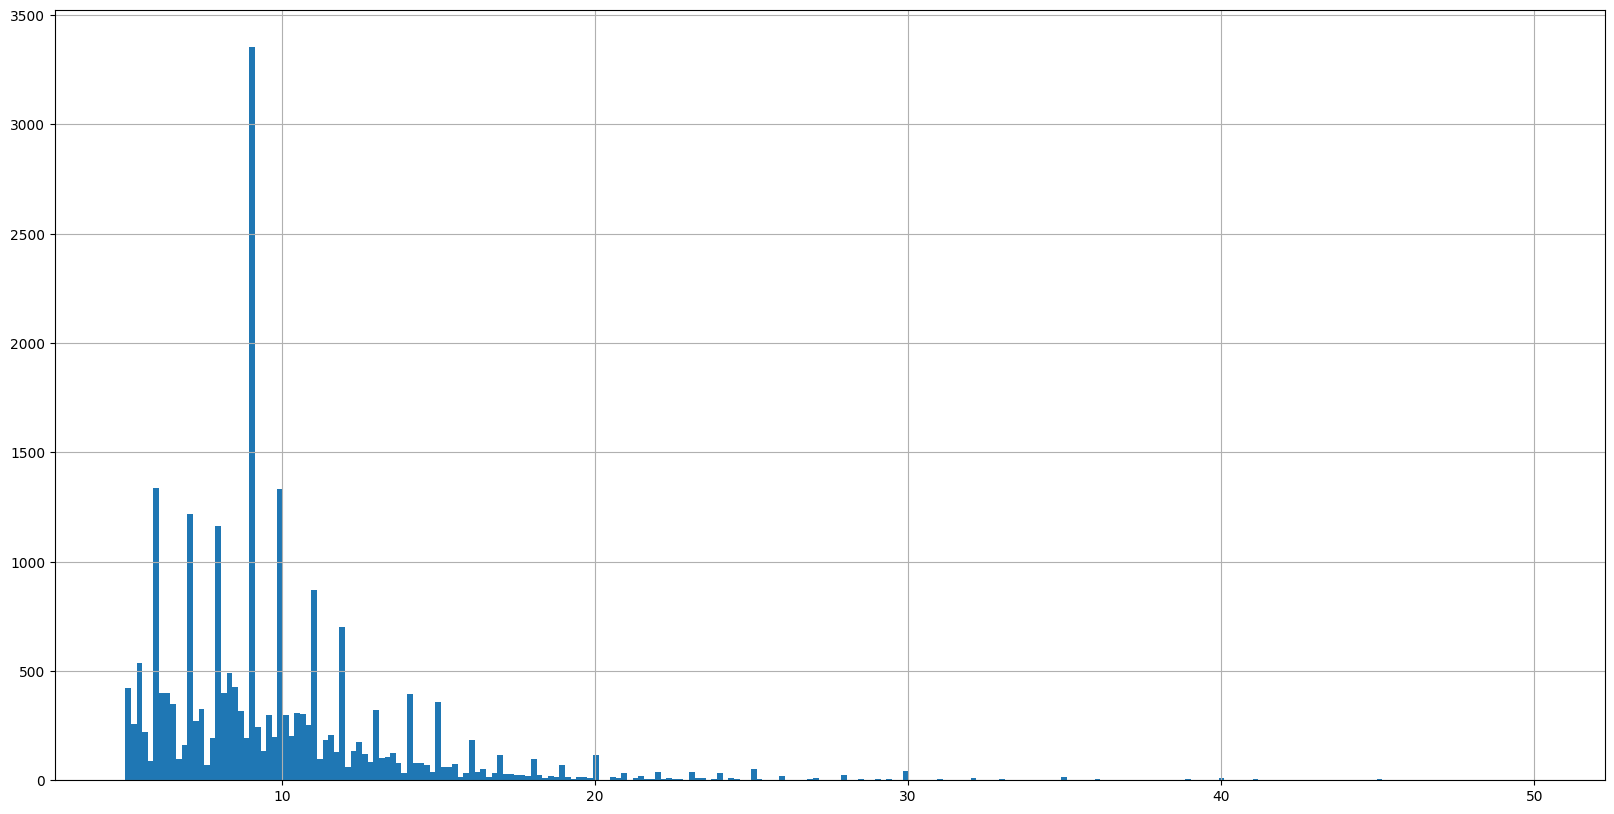

count    22666.000000
mean         9.997594
std          4.333043
min          5.000000
25%          7.200000
50%          9.000000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

In [78]:
# Кухонная зона
visual(data, "kitchen_area")

Вывод: среднее значение выше медианного из за очень небольшого количества выбросов. Основная часть данных по столбцу находится в интервале от 5 до 13

AxesSubplot(0.125,0.11;0.775x0.77)


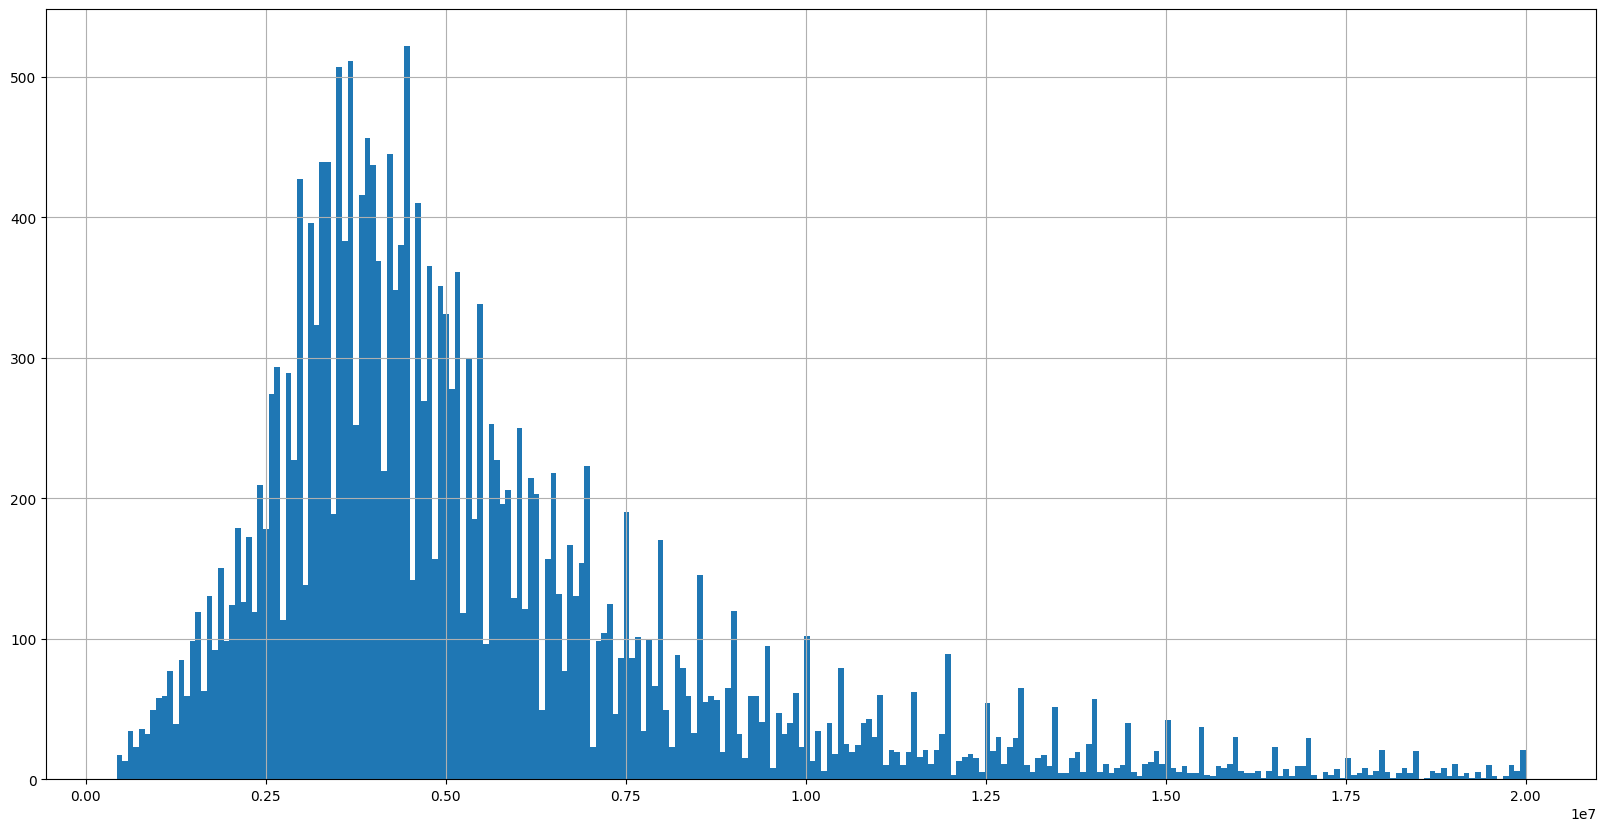

count    2.266600e+04
mean     5.408792e+06
std      3.179379e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

In [79]:
# Цена объекта
visual(data, "last_price")

Значение среднего выше медианного из за большого количества выбросов. Причина выбросов: завышенные цены на квартиры в Москве, СПБ, в центре городов с развитой инфраструктурой. 
Большинство значений находятся в интервале от 2.5 млн до 6.5 млн. 

AxesSubplot(0.125,0.11;0.775x0.77)


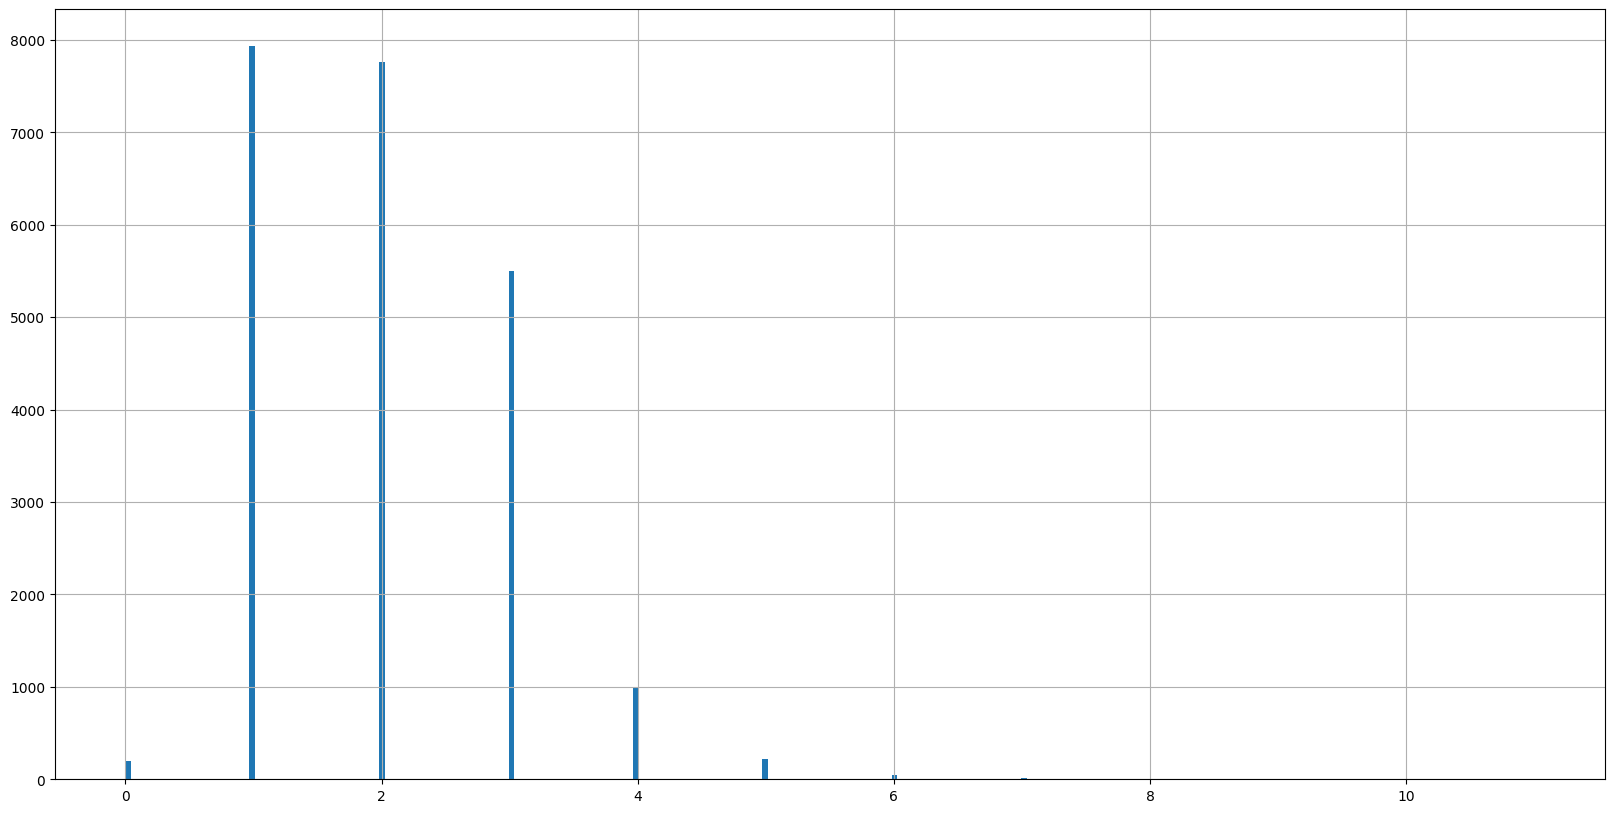

count    22666.000000
mean         2.004147
std          0.971275
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [80]:
# Количество комнат
visual(data, "rooms")

Среднее чуть выше медианного, из за незначительного количества выбросов.
В основном квартиры в продаже из 1-2 или 3 комнат, реже 4

AxesSubplot(0.125,0.11;0.775x0.77)


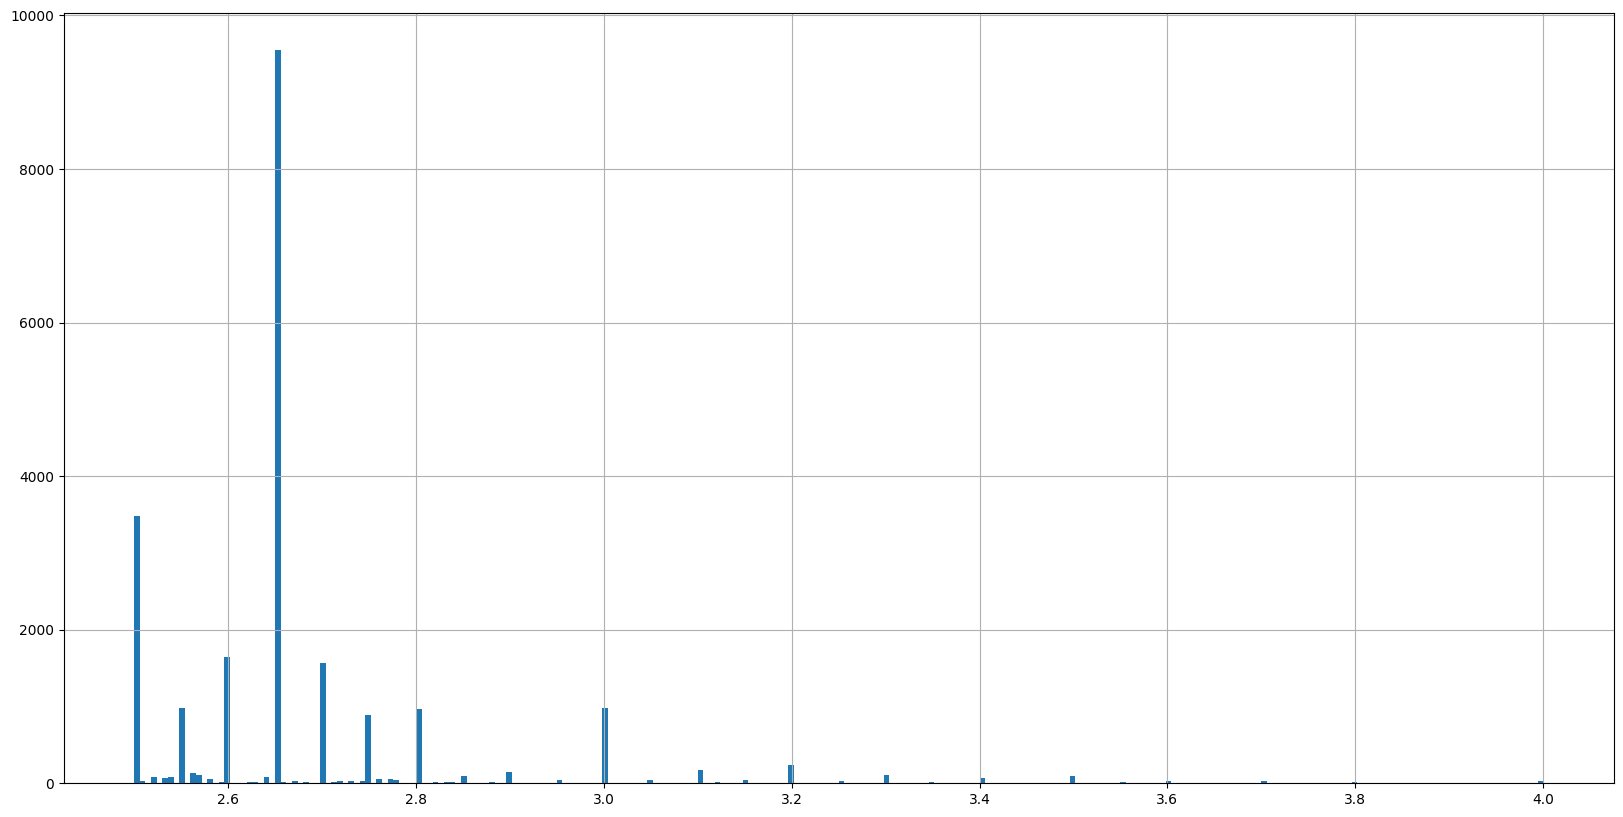

count    22666.000000
mean         2.684931
std          0.190007
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [81]:
# Высота потолков
visual(data, "ceiling_height")

Среднее выше медианного из за разброса. Разброс вызван скорее всего засчет нежилых помещений с высокими потолками, чтобы вмещались крупные шкафы с продукцией. В основном 2.65 - высота

AxesSubplot(0.125,0.11;0.775x0.77)


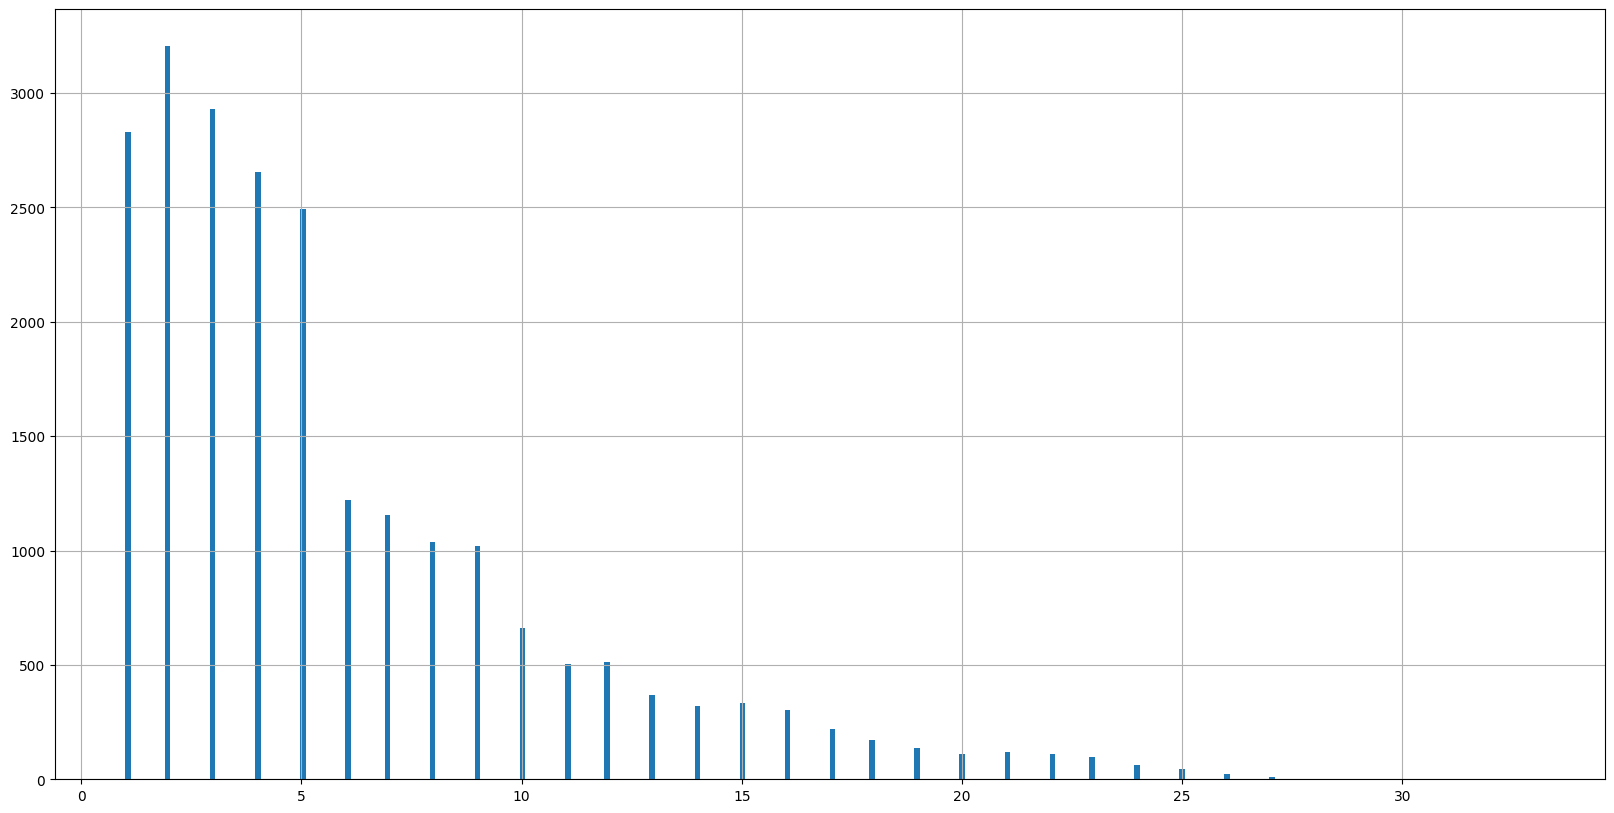

count    22666.000000
mean         5.907791
std          4.905079
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [82]:
# Этаж квартиры
visual(data, "floor")

Вывод: среднее выше медианного из за высокого разброса, связанного с различными типами зданий. Квартир продающихся на 5 этаже гораздо больше, чем квартир на 10 или тем более 25 этаже. Чем выше этажность, тем меньшее количество квартир на продаже.

AxesSubplot(0.125,0.11;0.775x0.77)


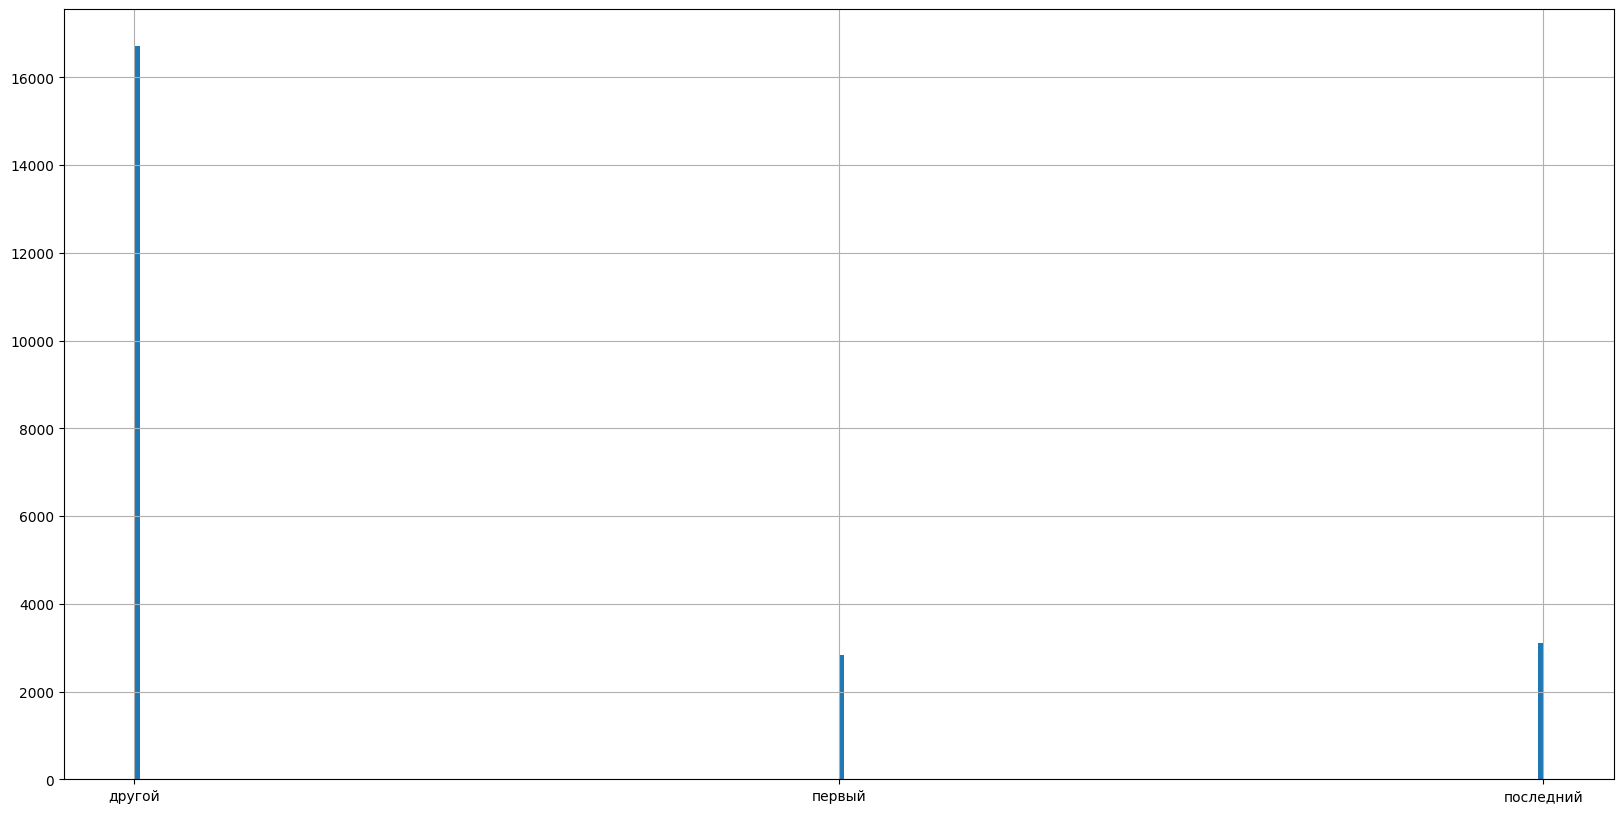

count      22666
unique         3
top       другой
freq       16719
Name: floor_type, dtype: object

In [83]:
visual(data, "floor_type")

Вывод: В основном квартиры расположены не на первом и не на последнем этаже

AxesSubplot(0.125,0.11;0.775x0.77)


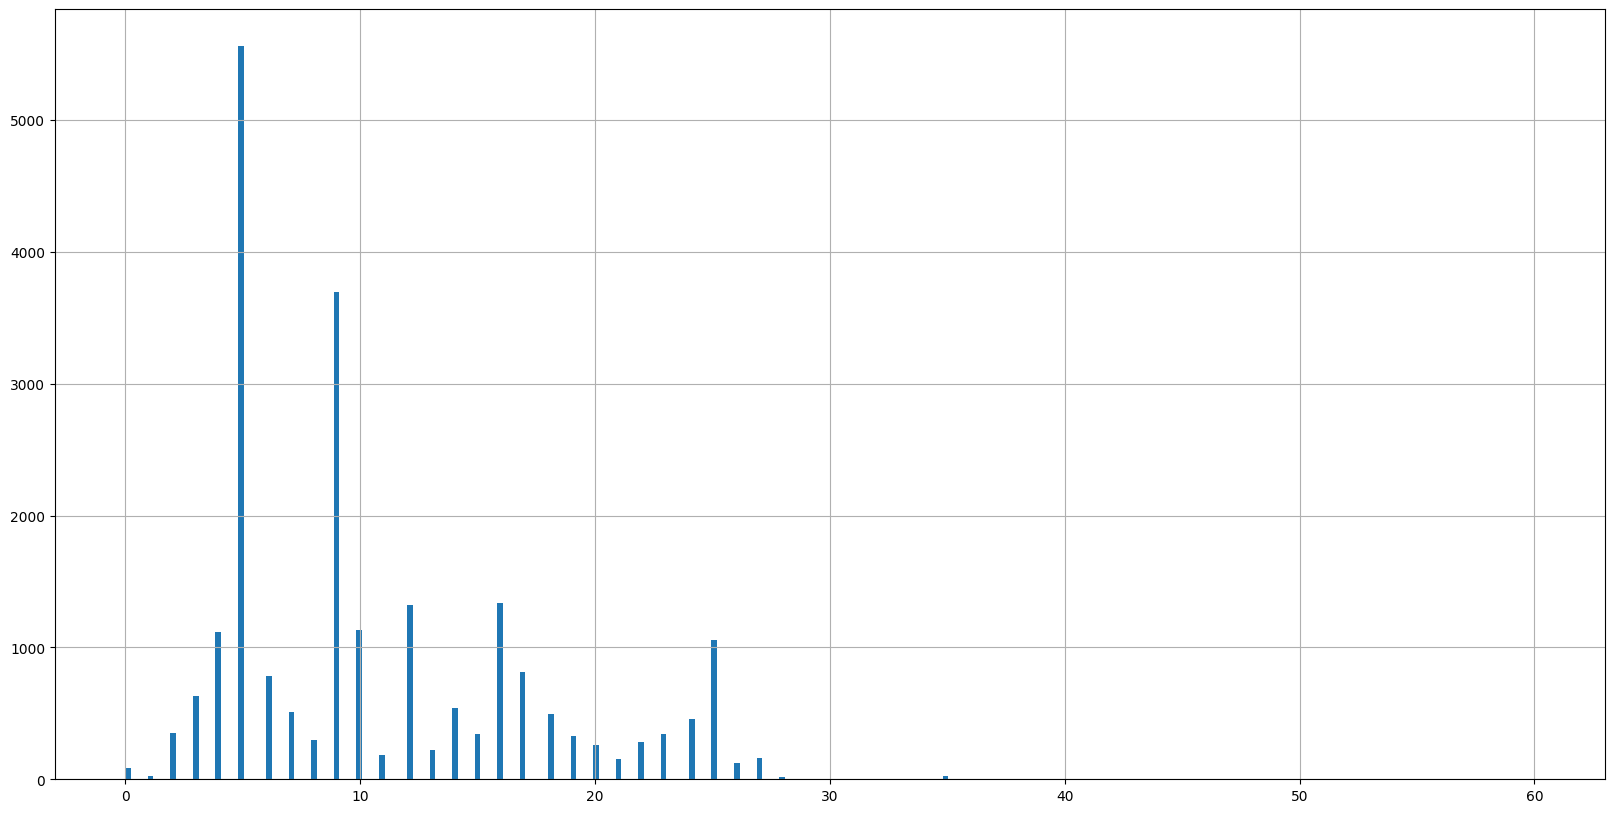

count      22666.0
mean     10.735551
std       6.648646
min            0.0
25%            5.0
50%            9.0
75%           16.0
max           60.0
Name: floors_total, dtype: Float64

In [84]:
# Общее количество этажей в доме
visual(data, "floors_total")

Среднее выше медианного из за выбросов, связанных с типом домов от пятиэтажек до небоскребов. Основная часть квартир лежит в домах с этажностью в 5

AxesSubplot(0.125,0.11;0.775x0.77)


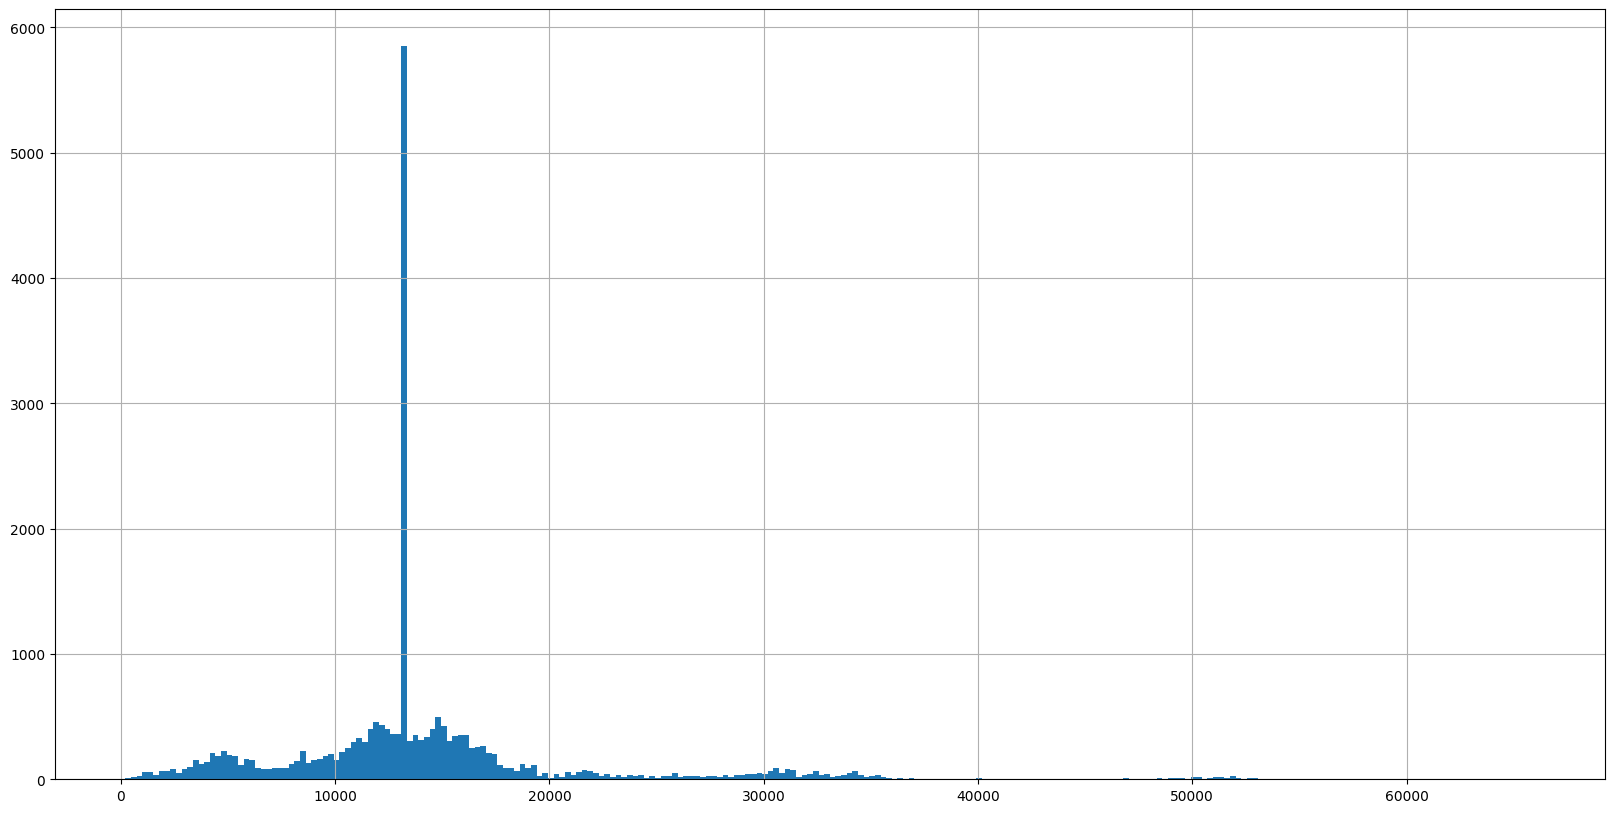

count    22666.000000
mean     14216.656666
std       7466.814571
min        208.000000
25%      11313.000000
50%      13288.000000
75%      15393.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [85]:
# Расстояние до центра города
visual(data, "cityCenters_nearest")

Вывод: Среднее выше медианного из за сильного разброса в значениях. Причина в том, что некоторые квартиры продаются в деревнях и на станциях, откуда до центра города очень далеко, нежели в самих городах. Основная масса квартир в районе 14 км от центра.

AxesSubplot(0.125,0.11;0.775x0.77)


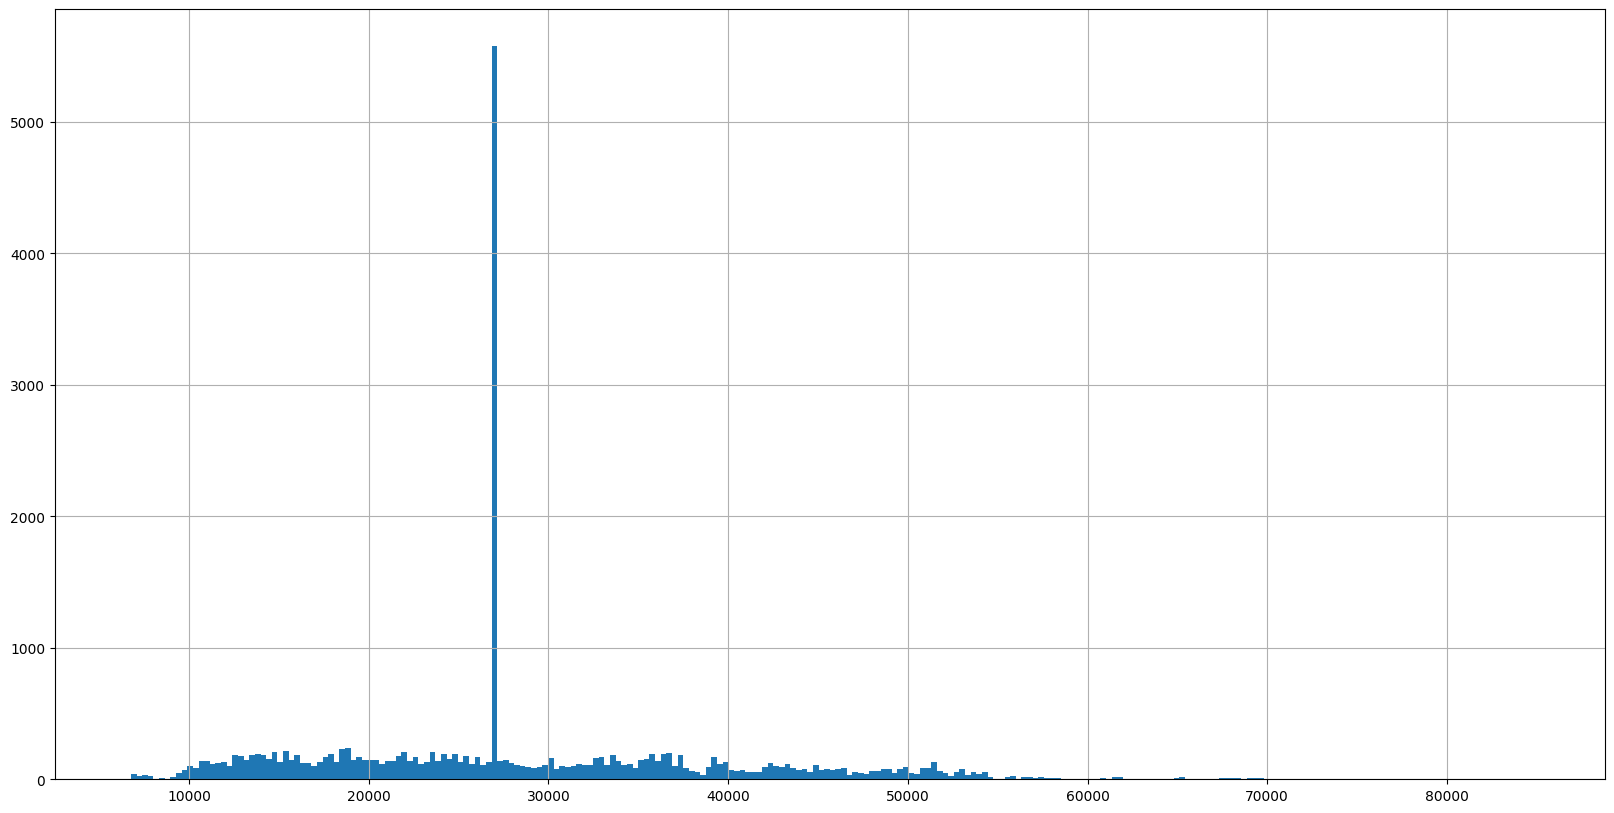

count    22666.000000
mean     28410.637254
std      11183.184152
min       6450.000000
25%      20936.000000
50%      26911.000000
75%      34639.750000
max      84869.000000
Name: airports_nearest, dtype: float64

In [86]:
# Расстояние до аэропорта
visual(data, "airports_nearest")

Среднее выше медианного из за большого разброса значений. Причина в том, что во многих населенных пунктах нет аэропорта, и необходимо ехать до ближайшего города, в котором он есть, и в зависимости от того, что деревня это, или город, меняется и расстояние.

AxesSubplot(0.125,0.11;0.775x0.77)


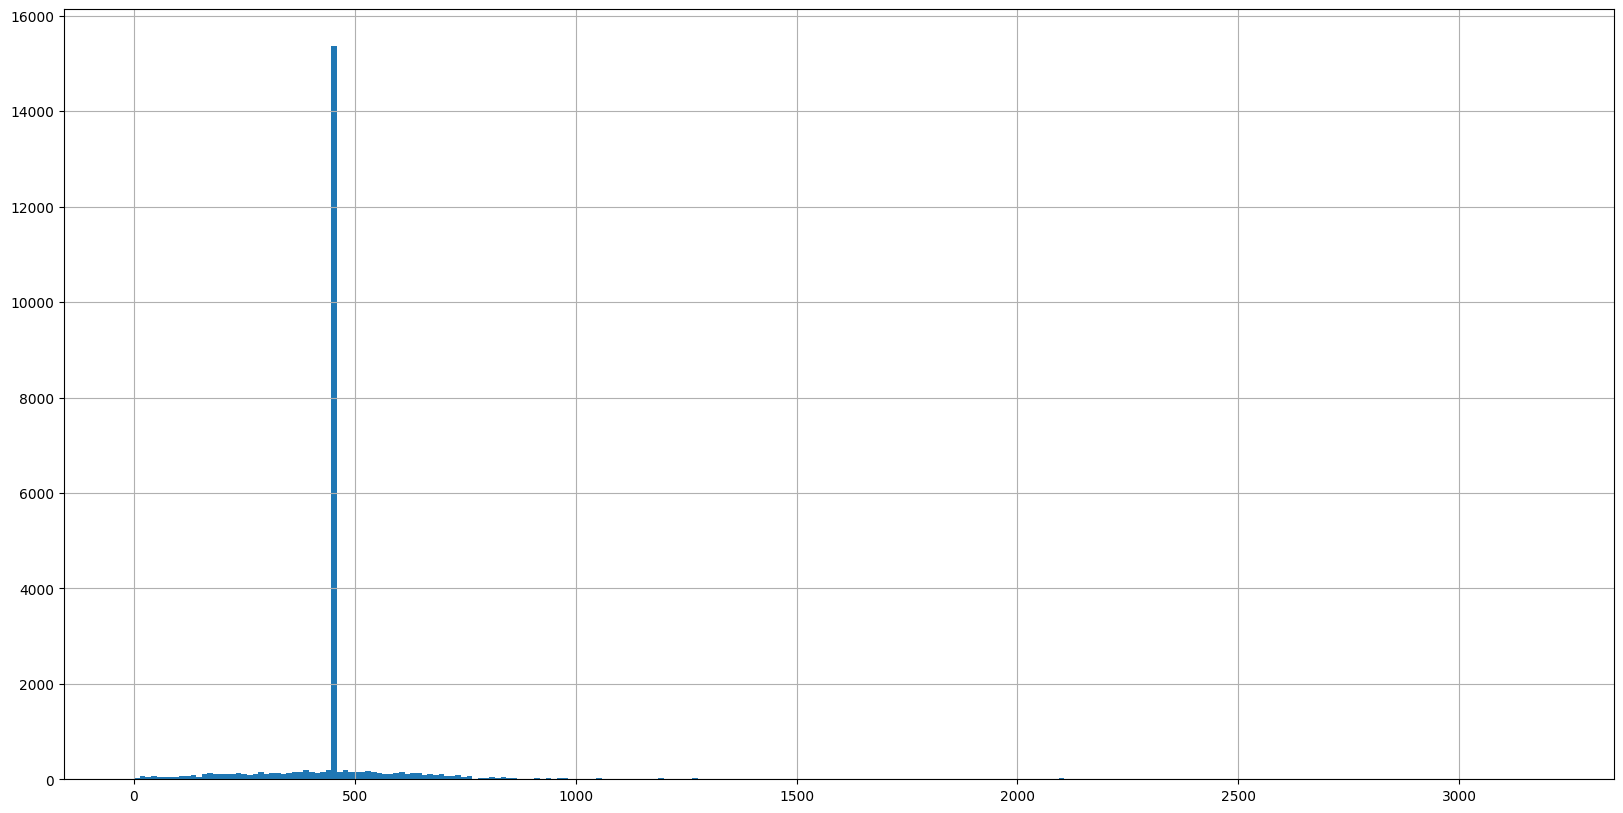

count    22666.000000
mean       468.462631
std        197.824900
min          1.000000
25%        456.000000
50%        456.000000
75%        456.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [87]:
# Расстояние до ближайшего парка
visual(data, "parks_nearest")

Среднее выше медианного из за выбросов, связанных с районом. В промышленных районах парки встречаются реже, нежели в центре города или на природе (деревне, селе, станции)

AxesSubplot(0.125,0.11;0.775x0.77)


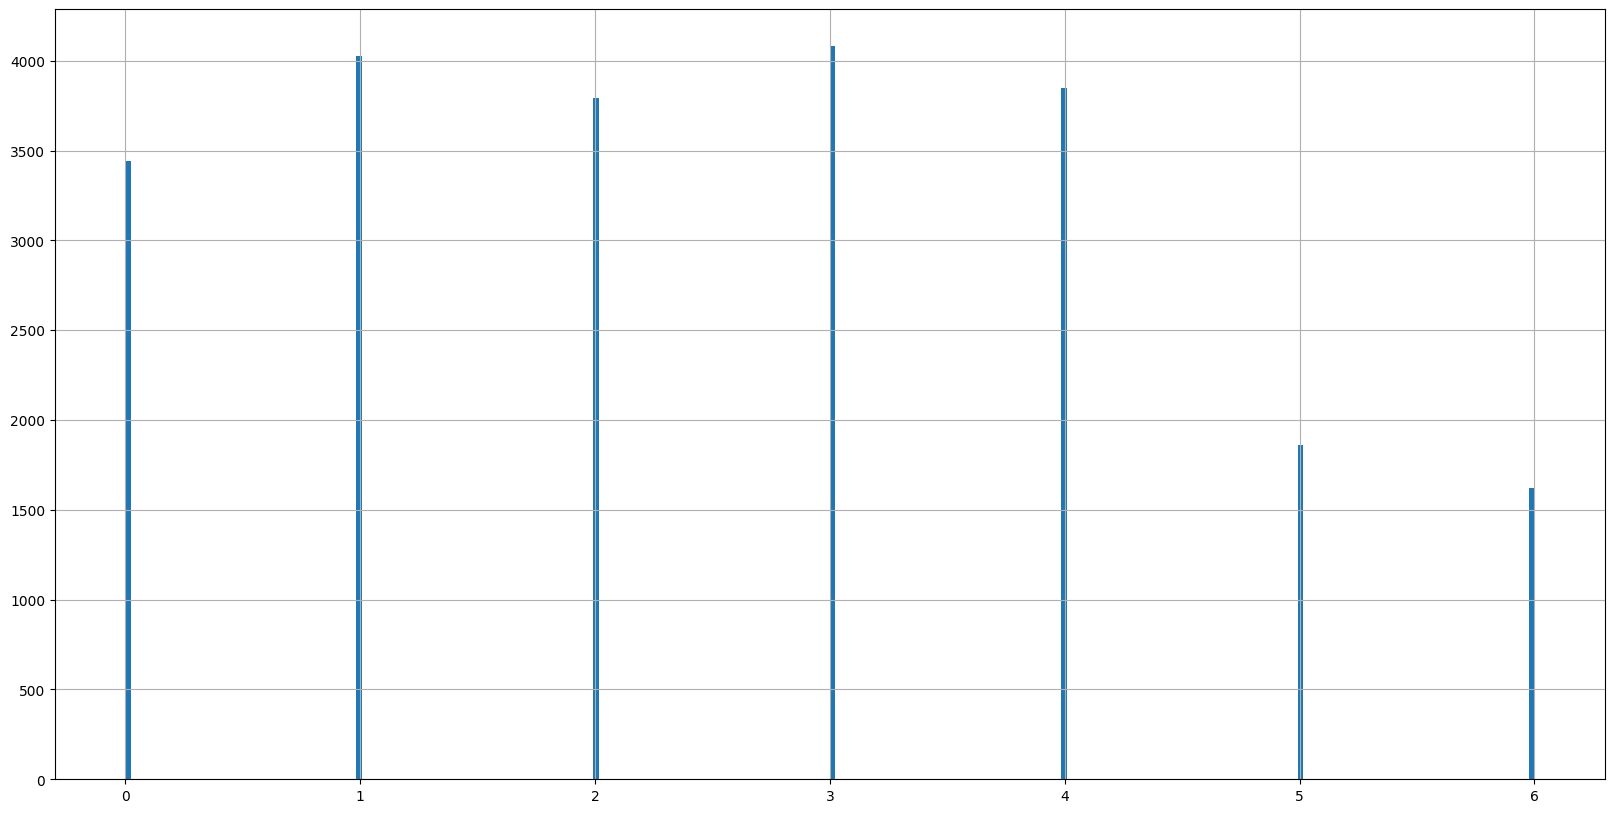

count    22666.000000
mean         2.570370
std          1.788907
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_the_week, dtype: float64

In [88]:
# День публикации объявления
visual(data, "day_of_the_week")

В большинстве случаев объявления публиковались по будням, реже в выходные

AxesSubplot(0.125,0.11;0.775x0.77)


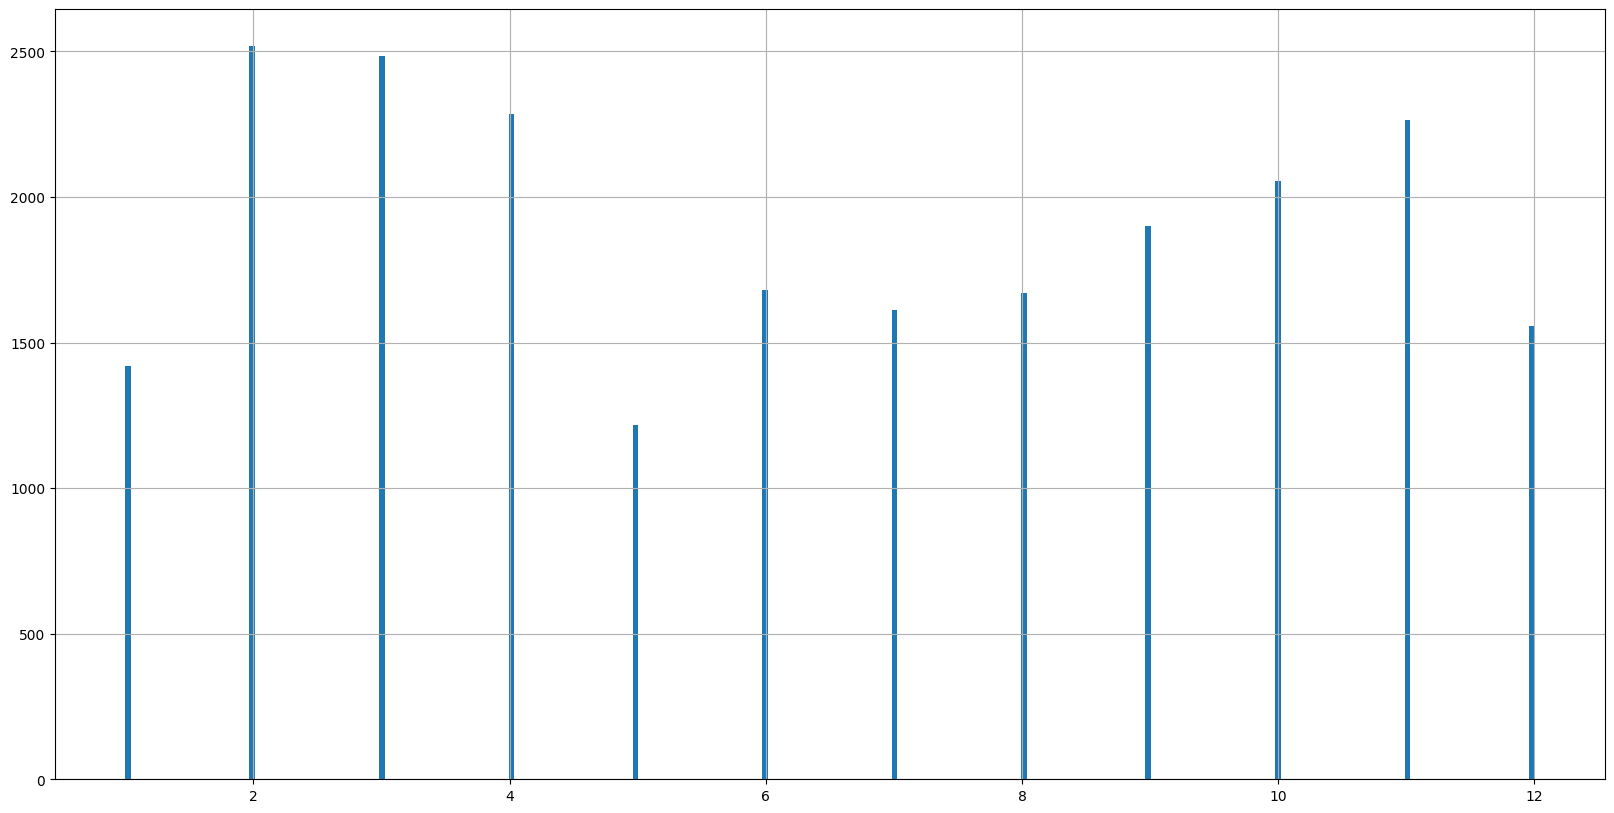

count    22666.000000
mean         6.402497
std          3.488451
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_publication, dtype: float64

In [89]:
# Месяц публикации объявления
visual(data, "month_of_publication")

В основном объявления публиковались весной и осенью, летом и зимой публикаций значительно меньше. Причина может быть в спросе

Изучите, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
- Постройте гистограмму.
- Посчитайте среднее и медиану.

В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

AxesSubplot(0.125,0.11;0.775x0.77)


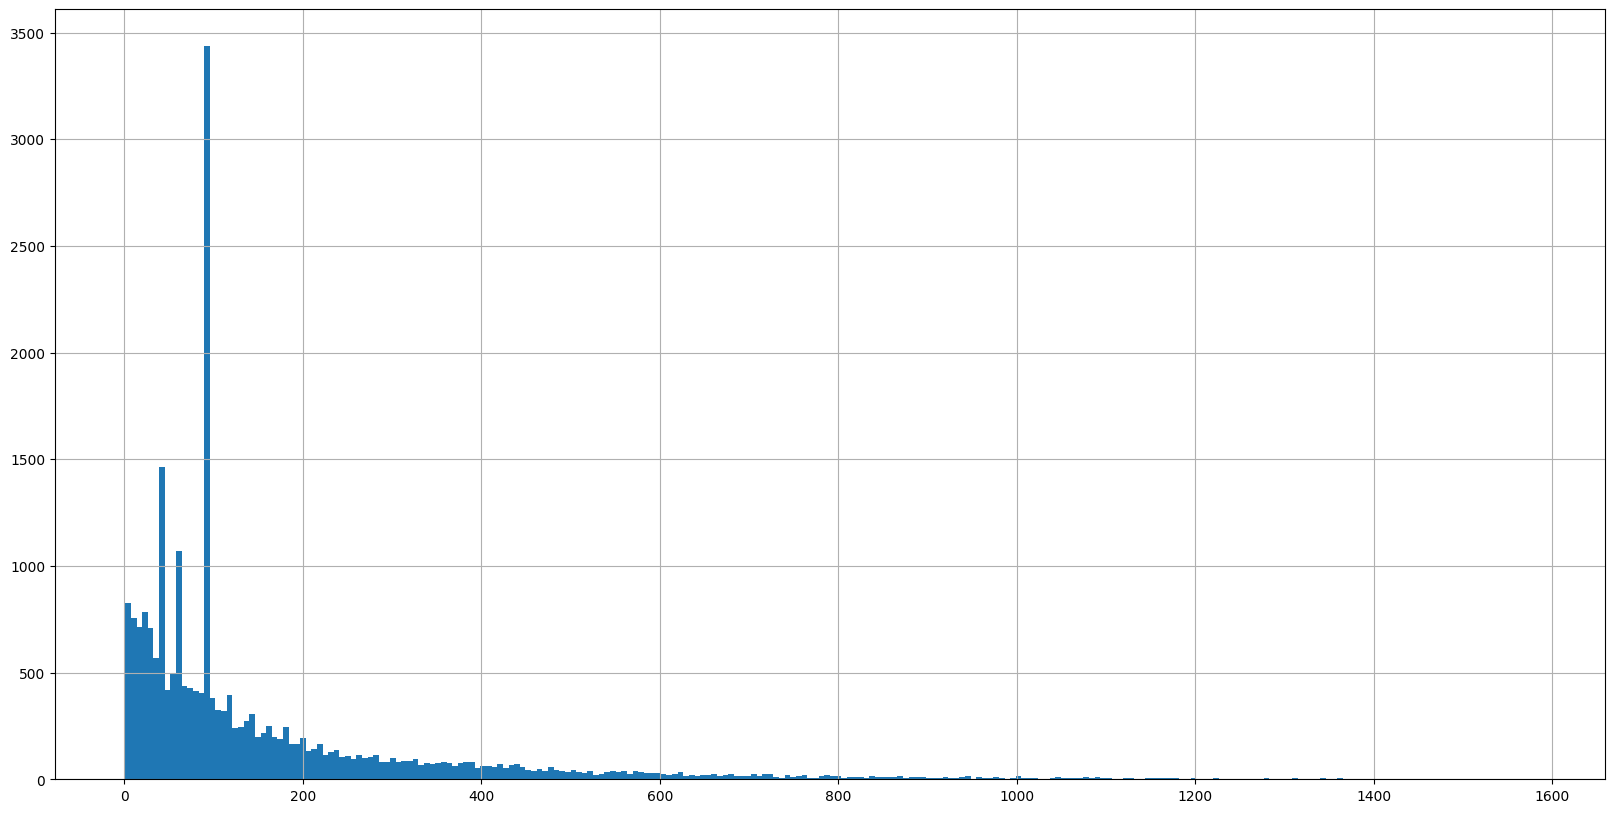

count       22666.0
mean     166.690859
std      203.899399
min             1.0
25%            45.0
50%            93.0
75%           195.0
max          1580.0
Name: days_exposition, dtype: Float64

In [90]:
# Построим график и получим значения среднего и медианы
visual(data, "days_exposition")

Среднее значение очень сильно выше медианного, в связи с тем, что некоторые объявления держались слишком много времени, образовался сильный разброс. В основном объявления закрывались за 100 дней. Быстрейшая продажа - всего один день, 75% всех объявлений были закрыты менее чем за 195 дней. Самое долгоживущее - 1580 дней.

Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

AxesSubplot(0.125,0.11;0.775x0.77)
Уровень линейной взаимосвязи (корреляции) = 0.7740688807954924


count       22666.0
mean     166.690859
std      203.899399
min             1.0
25%            45.0
50%            93.0
75%           195.0
max          1580.0
Name: days_exposition, dtype: Float64

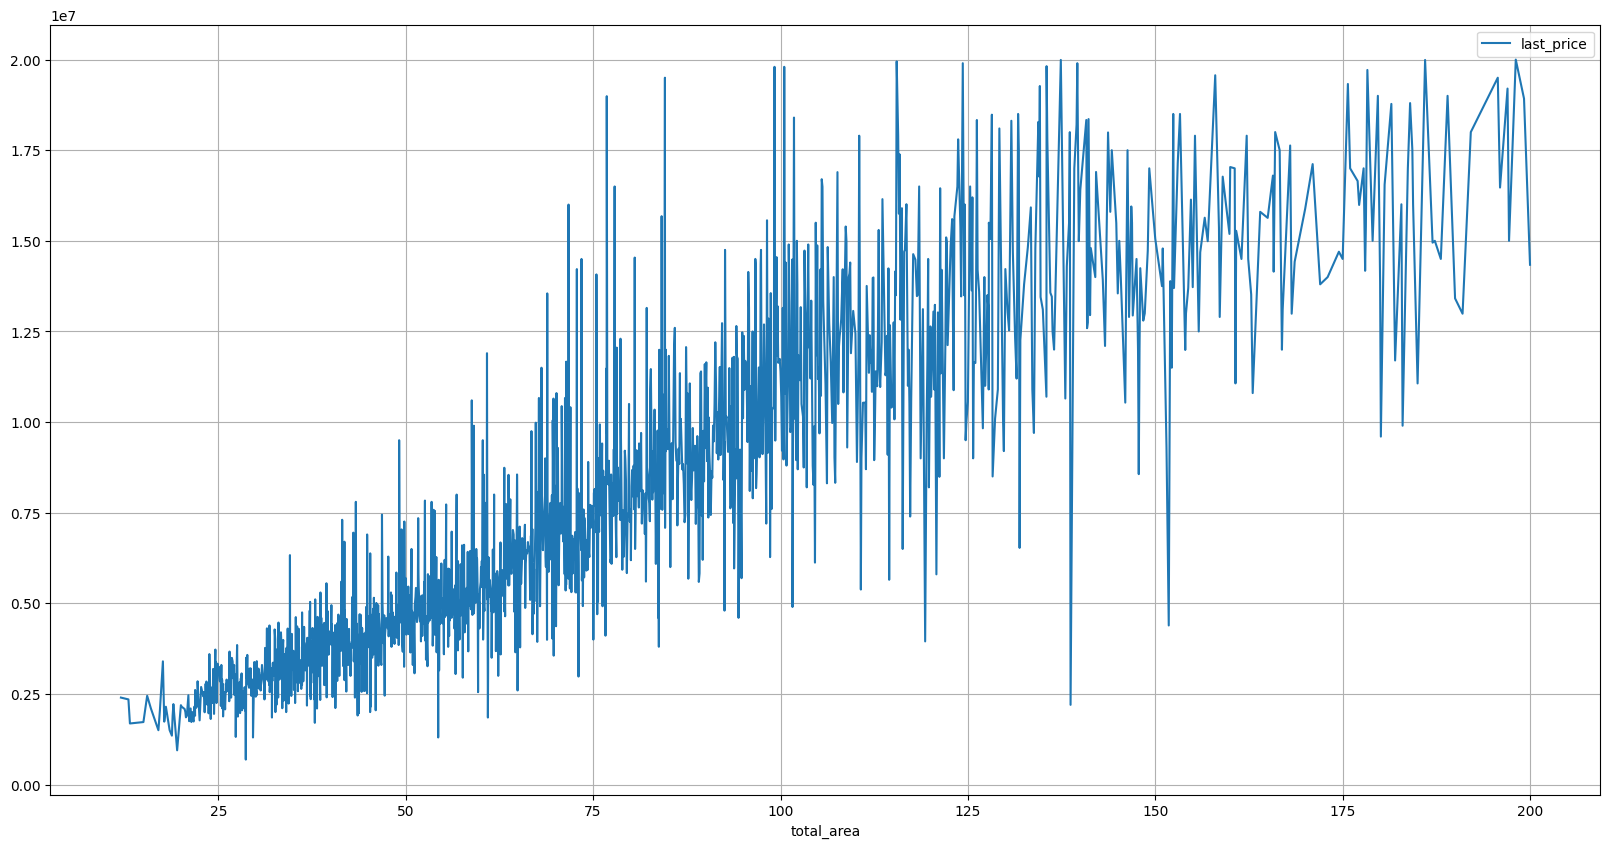

In [91]:
"""Создадим функцию для построения сводной таблицы в виде графика при помощи метода pivot_table() c показателями
- сводной статистики и коэффициента корреляции"""

def corr_visual(index, values="last_price", correlation=True):
    print(data.pivot_table(index=index, values=values).plot(grid=True, figsize=(20, 10)))
    if correlation:
        print(f"Уровень линейной взаимосвязи (корреляции) = {data[index].corr(data[values])}")
    return display(data[column].describe())


# Соотношение общей площади к цене
corr_visual("total_area")

AxesSubplot(0.125,0.11;0.775x0.77)
Уровень линейной взаимосвязи (корреляции) = 0.6316665111438539


count       22666.0
mean     166.690859
std      203.899399
min             1.0
25%            45.0
50%            93.0
75%           195.0
max          1580.0
Name: days_exposition, dtype: Float64

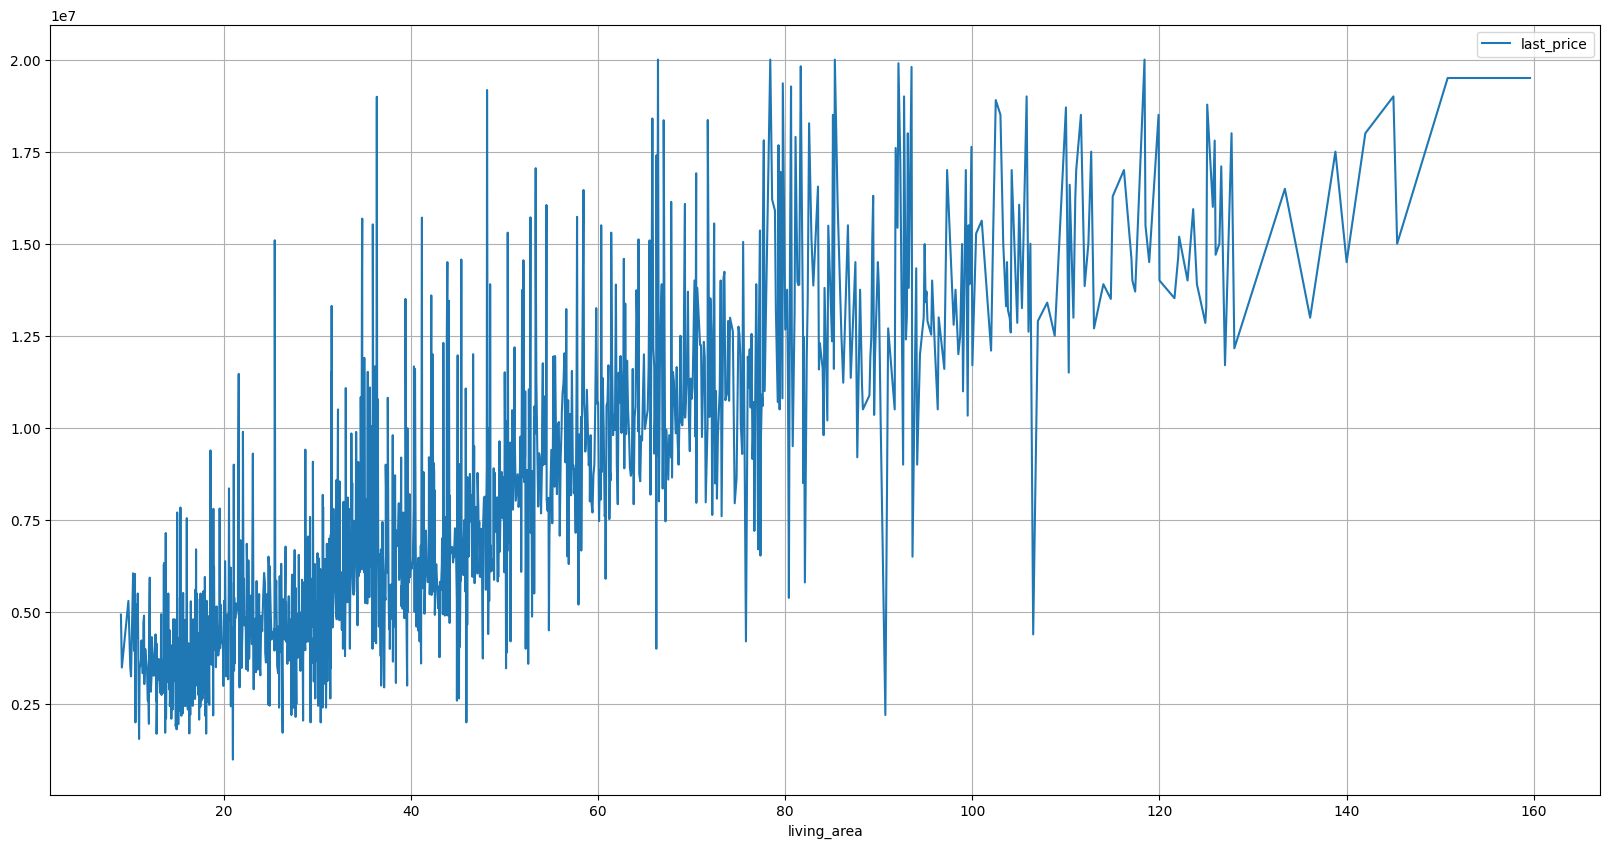

In [92]:
# Соотношение жилой площади к цене
corr_visual("living_area")

AxesSubplot(0.125,0.11;0.775x0.77)
Уровень линейной взаимосвязи (корреляции) = 0.549733552418902


count       22666.0
mean     166.690859
std      203.899399
min             1.0
25%            45.0
50%            93.0
75%           195.0
max          1580.0
Name: days_exposition, dtype: Float64

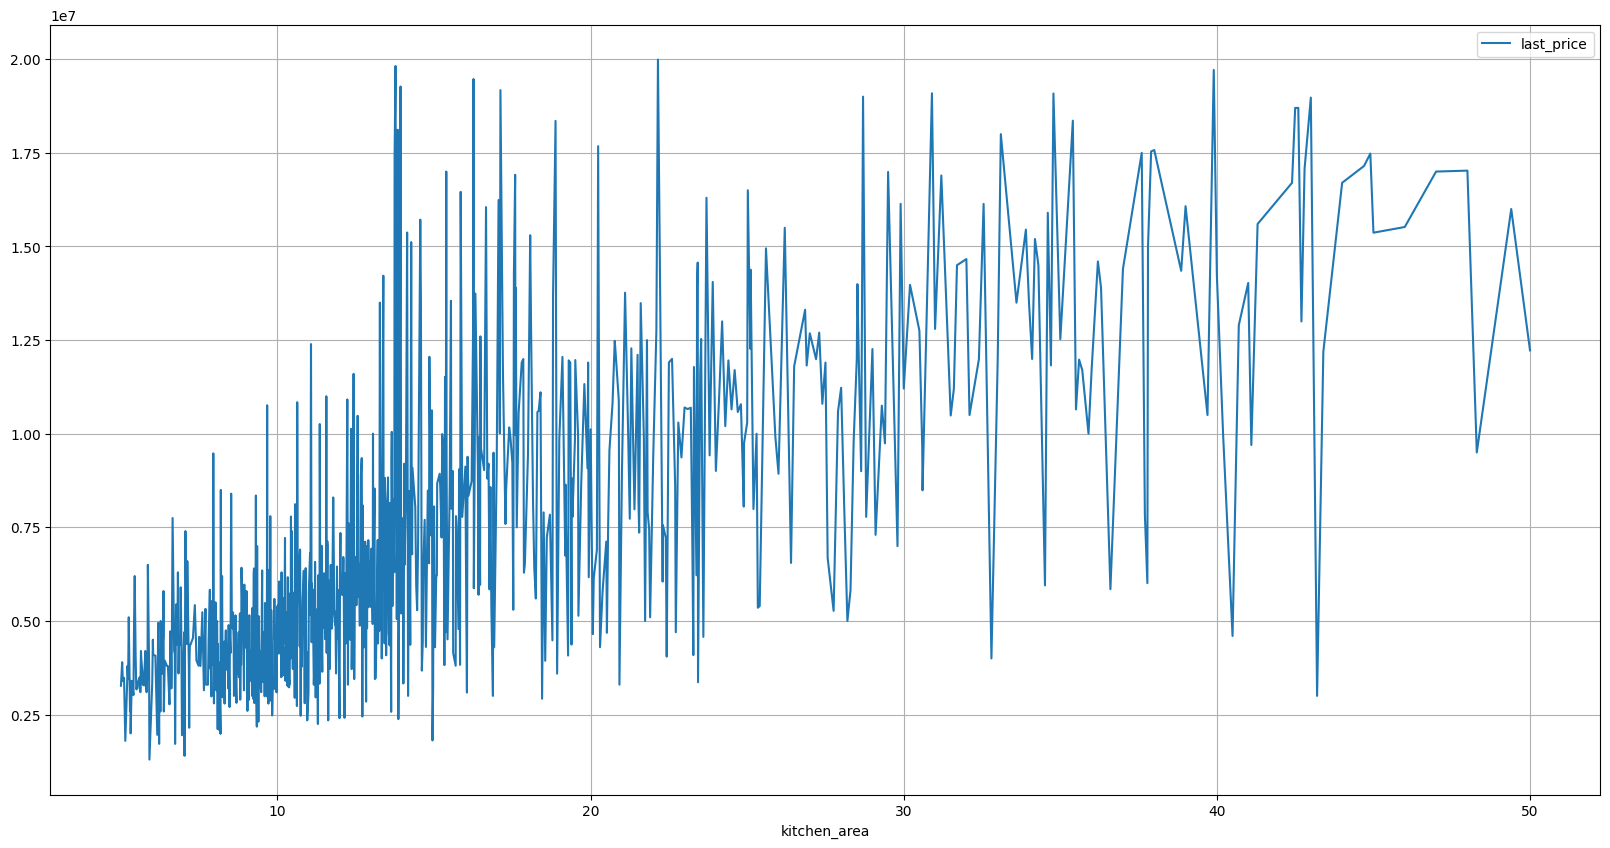

In [93]:
# Соотношение кухонной области к цене
corr_visual("kitchen_area")

AxesSubplot(0.125,0.11;0.775x0.77)
Уровень линейной взаимосвязи (корреляции) = 0.5039238298330694


count       22666.0
mean     166.690859
std      203.899399
min             1.0
25%            45.0
50%            93.0
75%           195.0
max          1580.0
Name: days_exposition, dtype: Float64

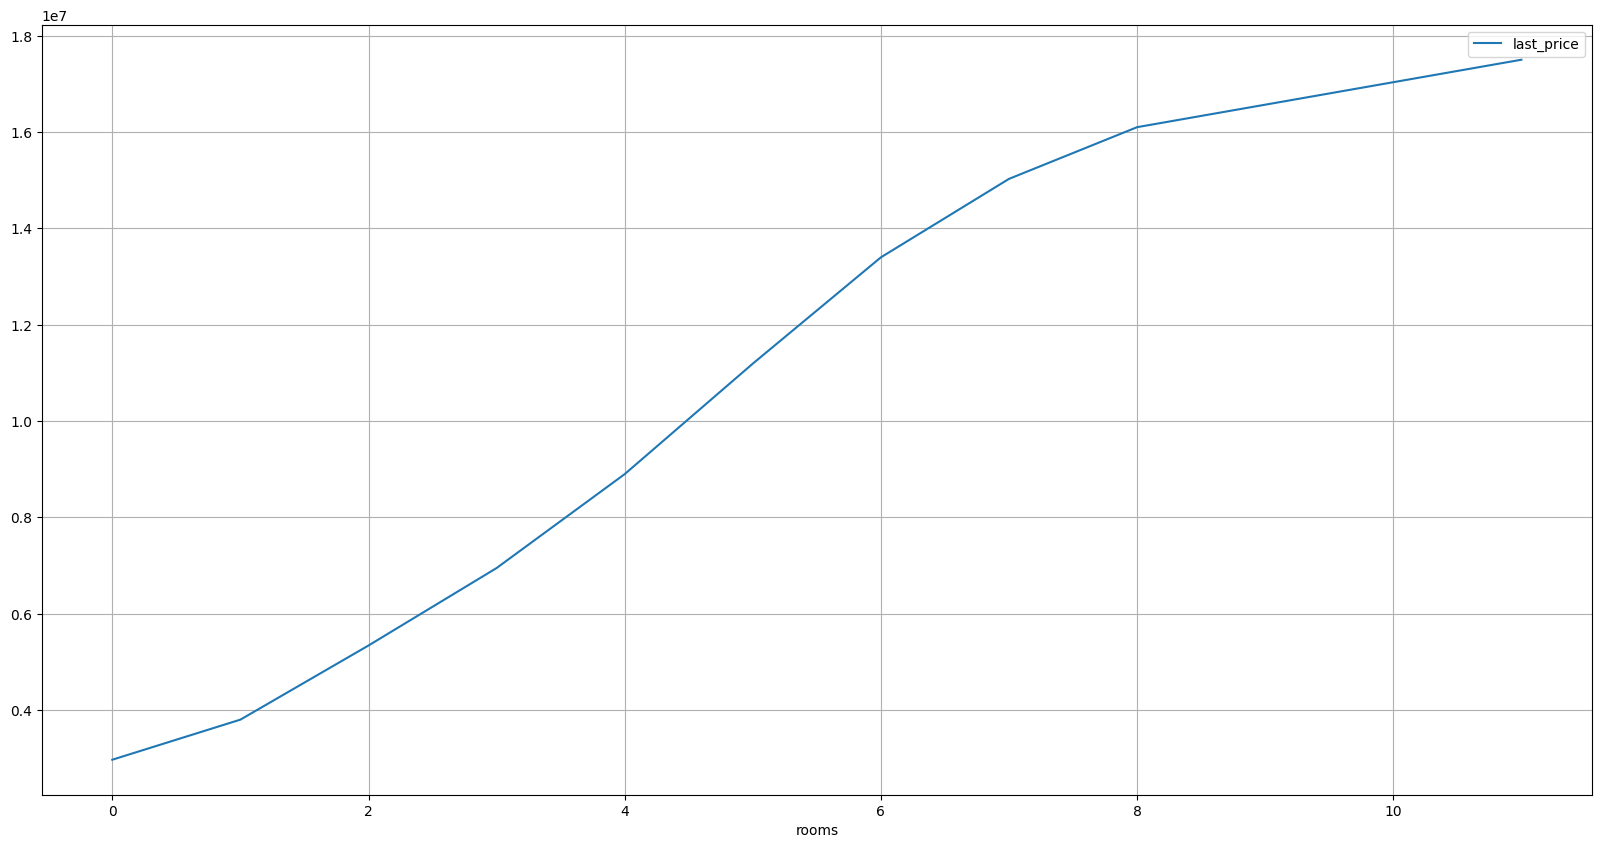

In [94]:
# Соотношение количества комнат к цене
corr_visual("rooms")

AxesSubplot(0.125,0.11;0.775x0.77)


count       22666.0
mean     166.690859
std      203.899399
min             1.0
25%            45.0
50%            93.0
75%           195.0
max          1580.0
Name: days_exposition, dtype: Float64

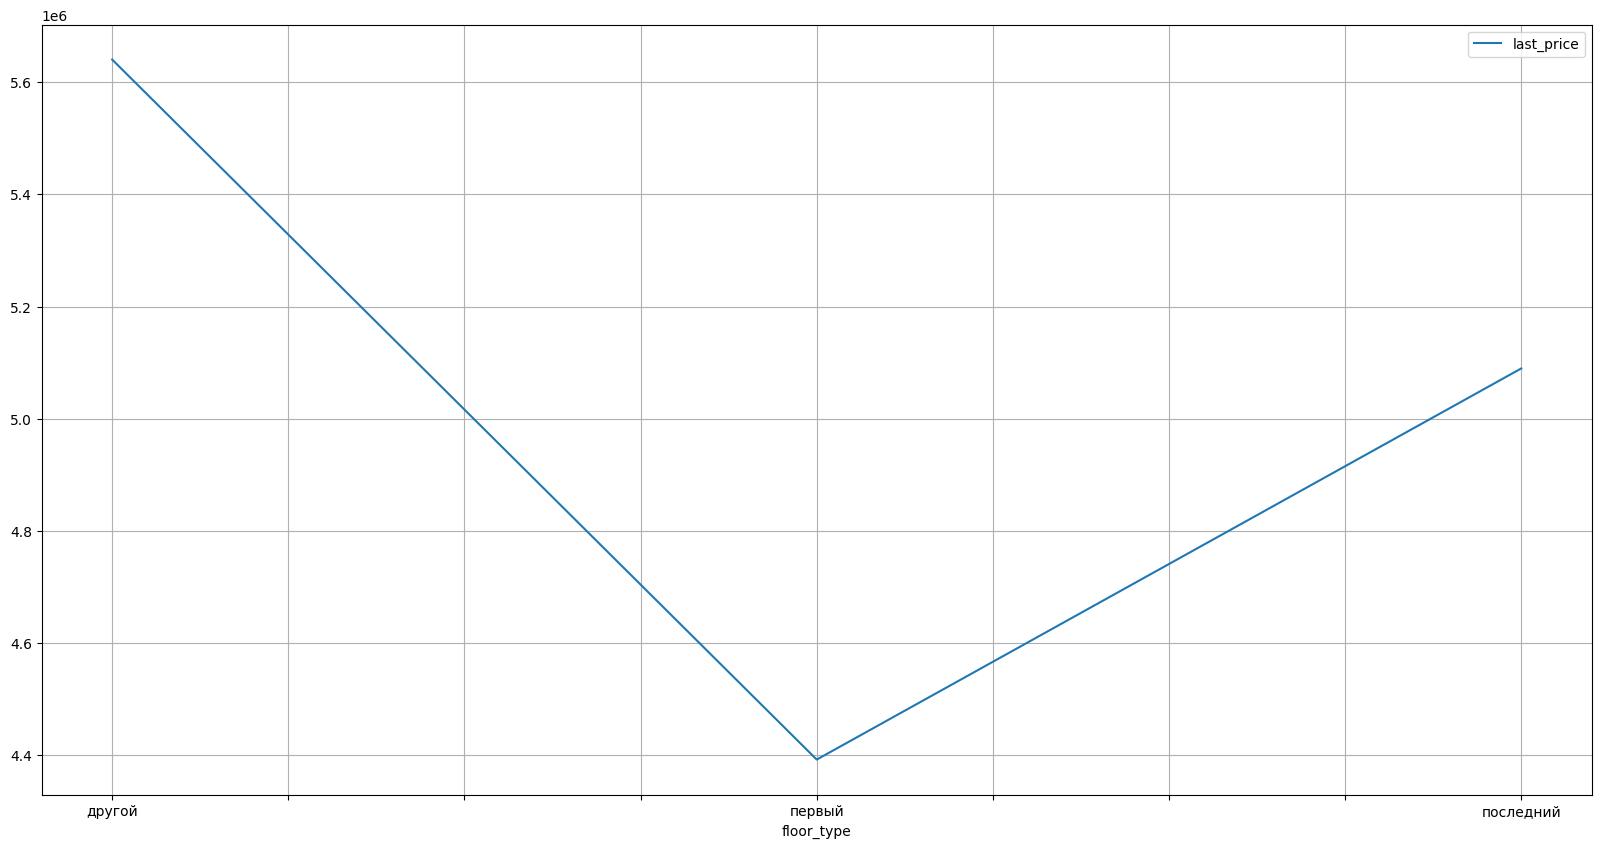

In [95]:
# Соотношение типов этажей к цене
corr_visual("floor_type", correlation=False)

К данным нельзя применять корреляцию, так как являются категориальными. Видно, что цена повышается в зависимости от этажа. На первом этаже самые дешевые квартиры, на последнем уже значительно дороже. Самые дорогие находятся на "других", скорее из за того, что богачи не хотят жить на первом этаже из за чувства дискомфорта, как визуального, так и слухового. А еще на последних этажах могут быть пентхаусы, что так же повышает взаимосвязь между ценой и типом этажа. Другие побеждают только из за массовости, их просто больше.

AxesSubplot(0.125,0.2;0.775x0.68)


count       22666.0
mean     166.690859
std      203.899399
min             1.0
25%            45.0
50%            93.0
75%           195.0
max          1580.0
Name: days_exposition, dtype: Float64

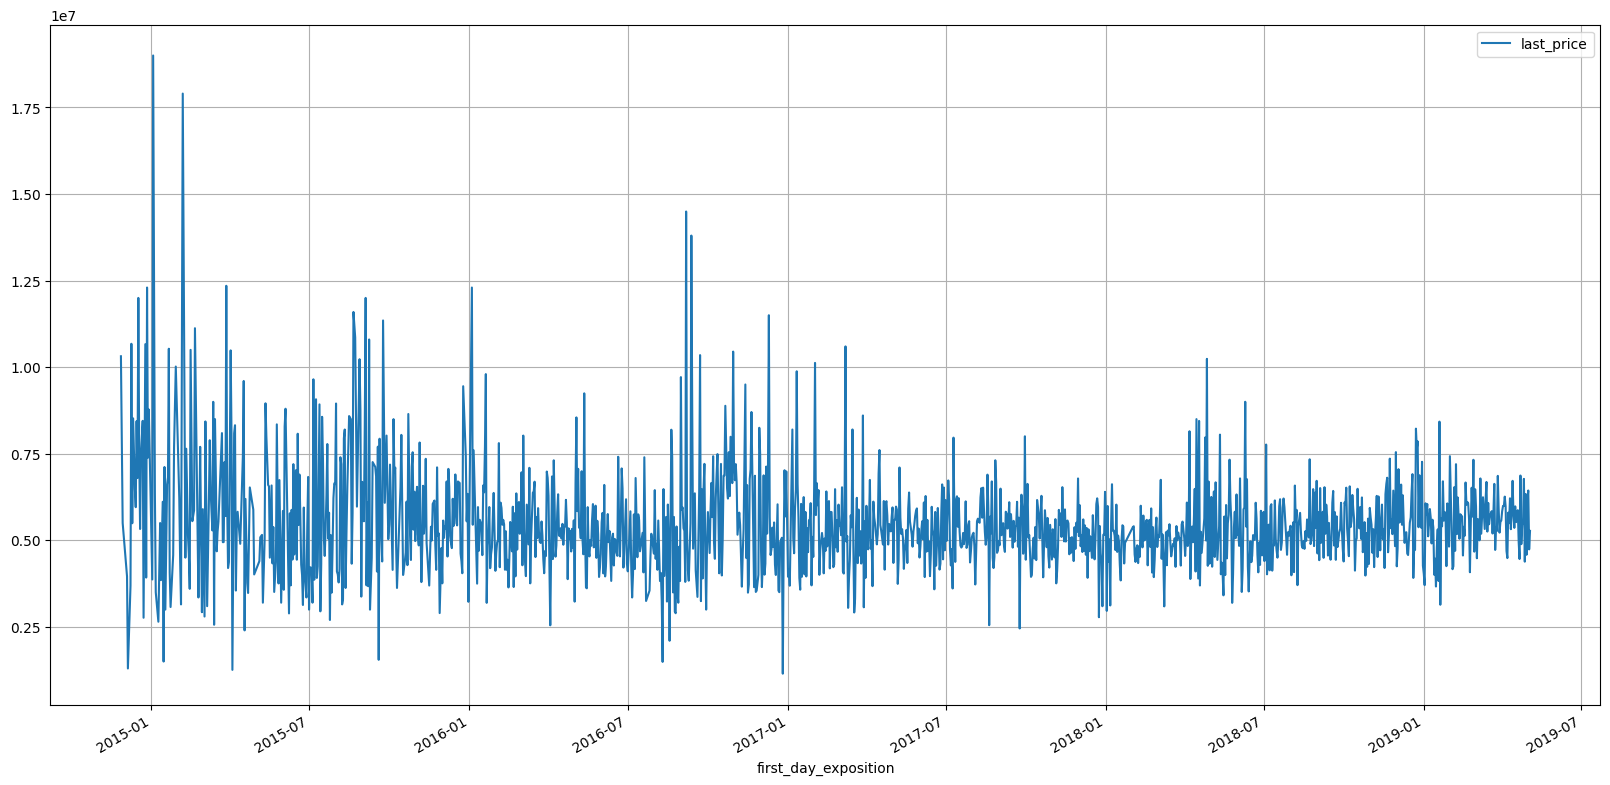

In [96]:
# Дата размещения
corr_visual("first_day_exposition", correlation=False)

В 2015-ом году цены на квартиры достигали своего пика, потом переменно понижались и к 2019 стоят уже гораздо дешевле, чем ранее.

Взаимосвязь между ценой и проверяемыми данными:
- Площадь к цене = 0.774 - Прямая сильная связь
- Жилая площадь к цене = 0.631 - Прямая средняя связь
- Площадь кухни к цене = 0.55 - Прямая средняя связь
- Количество комнат к цене = 0.503 - Прямая средняя связь
- Тип этажа к цене - Прямая средняя связь на глаз
- Дата размещения к цене - есть связь между ценами и годом. Чем год выше 2015-ого, тем цена на квартиру меньше.

Все эти данные влияют на стоимость квартиры, в большей степени общая площадь, в меньшей степени количество комнат, но все же, все эти данные - важны, так как имеют достаточно серьезную взаимосвязь с ценой.


---

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.

In [97]:
"""Сначала сгруппируем данные при помощи groupby(), так же используем agg(), аргументом передадим словарь, ключ в котором - то значение, которое
нас интересует, а значениями количество и среднее арифметическое. Количество для того, чтобы по нему определить наиболее число объявлений, а
среднее арифметическое будет по столбцу выдавать среднее значение цены одного квадратного метра. После этого отсортируем данные при помощи
sort_values() в аргументы передаем столбец для сортировки и значение по которому будет сортироваться, так как нам нужно по убыванию - 
в параметр ascending=False (по умолчанию по возрастанию=True) и выведем 10 первых значений
"""
grouped_data = data.groupby('locality_name').agg({'price_per_meter': ['count', 'mean']})
sorted_data = grouped_data.sort_values(by=('price_per_meter', 'count'), ascending=False)
display(sorted_data.head(10))

price_per_meter               
                            count           mean
locality_name                                   
Санкт-Петербург             14867  108661.110379
поселок Мурино                551   85548.504537
поселок Шушары                437   78538.990847
Всеволожск                    395   67222.989873
Пушкин                        350  101937.722857
Колпино                       336   75352.467262
поселок Парголово             325   90362.316923
Гатчина                       302   68846.387417
деревня Кудрово               299   92473.588629
Выборг                        233   58237.909871

In [98]:
top_10 = sorted_data.head(10)
min_value = top_10['price_per_meter'].min()
max_value = top_10['price_per_meter'].max()
print(f'Самая низкая стоимость квадратного метра = {min_value["mean"]}')
print(f'Самая высокая стоимость квадратного метра = {max_value["mean"]}')

Самая низкая стоимость квадратного метра = 58237.909871244636
Самая высокая стоимость квадратного метра = 108661.11037869105


---
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [102]:
# Присвоим переменной значения locality_name, где значение = Санкт-Петербург, используем copy() для копирования DataFrame, иначе выдает ошибку
saint_petersburg = data.loc[data['locality_name'] == 'Санкт-Петербург'].copy()
# Делим цену на количество километров
saint_petersburg['price_per_kilometer'] = saint_petersburg['last_price'] / saint_petersburg['distance_to_the_city_center']
# Определяем среднее по новому столбцу цены за километр
avg_price_per_km = saint_petersburg['price_per_kilometer'].mean()
# Выводим результат
print(f"Средняя цена за каждый километр до центра города в Санкт-Петербурге: {avg_price_per_km:.2f}")

Средняя цена за каждый километр до центра города в Санкт-Петербурге: inf


Мы получаем бесконечность, так как есть нулевые значения, и когда мы пытаемся разделить на 0, получаем inf, их нужно убрать. 

In [109]:
data = data.query('distance_to_the_city_center != 0')

In [113]:
saint_petersburg = data.loc[data['locality_name'] == 'Санкт-Петербург'].copy()
saint_petersburg['price_per_kilometer'] = saint_petersburg['last_price'] / saint_petersburg['distance_to_the_city_center']
avg_price_per_km = saint_petersburg['price_per_kilometer'].mean()
print(f"Средняя цена за каждый километр до центра города в Санкт-Петербурге: {avg_price_per_km:.2f}")

Средняя цена за каждый километр до центра города в Санкт-Петербурге: 884103.71


Отлично, теперь все выводится корректно

Для того, чтобы описать, как стоимость объектов зависит от расстояния до центра города, нам проще всего построить график

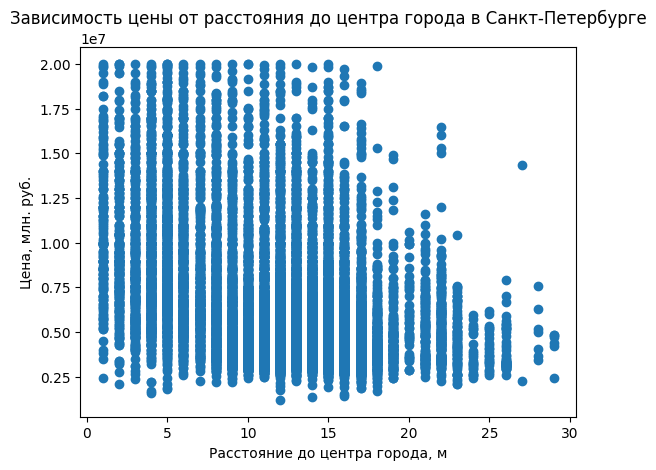

In [114]:
import matplotlib.pyplot as plt
plt.scatter(saint_petersburg['distance_to_the_city_center'], saint_petersburg['last_price'])
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Цена, млн. руб.')
plt.title('Зависимость цены от расстояния до центра города в Санкт-Петербурге')
plt.show()

Вывод: Чем дальше расстояние от центра, тем слабее влияние на цену жилья, в районе 30 километрах - почти нет влияния

> # **Общий вывод**

Мы выяснили факторы, которые влияют на цену жилья:
- В основном это общая площадь, что в принципе логично
- Так же влияние оказывает жилая площадь довольно сильно
- Некотрое влияние оказывают площадь кухни и количество комнат, но не так сильно, как эти
- Нашли серьезную связь между расстоянием до центра города и ценой на жилье, что в принципе тоже логично и в реальной жизни все так и есть
- Так же есть слабая взаимосвязь по времени, раньше, в 2015-ом году цены на жилье были значительно выше, чем в 2019-ом